## Introduction

Context


The dataset used for this project contains over 370,000 used cars information with 20 attributes scraped with Scrapy from Ebay-Kleinanzeigen. In this dataset, each entry represents an offering of used car in Germany. The used cars dataset was collected between 03-05-2016 and 04-07-2016. The link to this used cars Kaggle dataset is located at https://www.kaggle.com/orgesleka/used-cars-database.


Content

The content of the original dataset is in German. Google Translator was used to make the necessary translations to English. 

The following is the description of the dataset 20 attributes:


•	dateCrawled:  The date when this advertisement was first crawled, all field-values were obtained on this date.

•	name: "name" of the car.

•	seller:  seller type – private or dealer.

•	offerType: Offer Type - offer or request.

•	price: the price in Euro on the advertisement to sell the car.

•	abtest: abtest category - test or control

•	vehicleType: vehicle body type - limousine, small car, station wagon, bus, cabrio, coupe, suv, other.

•	yearOfRegistration: At what year the car was first registered - the age of the car.

•	Transmission: Transmission Type - manual or automatic.

•	powerPS: Car Engine Power in PS

•	model: car model.

•	Kilometer: car mileage in kilometer.

•	monthOfRegistration: the month of the year the car was first registered.

•	fuelType: Fuel Type - gas, diesel, autogas, compressed natural gas, hybrid, other, or electric.

•	Brand: car brand

•	notRepairedDamage: Unrepaired Damage - yes or no.

•	dateCreated: The date the ad was created on Ebay-Kleinanzeigen.

•	nrOfPictures: number of pictures in the ad

•	postalCode: car seller postal code 

•	lastSeen: when the crawler saw this ad last online



## Required Libraries and dataset

In [1]:
# Load the pandas,numpy,matplotlib and other required libraries with an import statement
import pandas as pd                # importing pandas as pd
import numpy as np                 # importing numpy as np    
import matplotlib.pyplot as plt    #importing matplotlib as plt
import seaborn as sns              #importing seaborn as sns
%matplotlib inline
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import time

In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('autos_english.csv', sep=',',low_memory=False, encoding ='latin-1')

In [3]:
# Display the first ten lines of the dataset
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,Transmission,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/24/2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0.0,golf,150000,0.0,gas,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17


In [4]:
df.keys()

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'Transmission', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
# Display the last few lines of the dataset
df.tail(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,Transmission,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371530,4/2/2016 20:37,Bmw_320_D_DPF_Touring_!!!,private,offer,3999.0,test,station wagon,2005.0,manual,3.0,3er,150000,5.0,diesel,bmw,no,4/2/2016 0:00,0.0,81825.0,4/6/2016 20:47
371531,3/9/2016 13:37,Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll,private,offer,5250.0,control,NaN,2016.0,automatic,150.0,159,150000,12.0,NaN,alfa_romeo,no,3/9/2016 0:00,0.0,51371.0,3/13/2016 1:44
371532,3/19/2016 19:53,turbo_defekt,private,offer,3200.0,control,limousine,2004.0,manual,225.0,leon,150000,5.0,gas,seat,yes,3/19/2016 0:00,0.0,96465.0,3/19/2016 20:44
371533,3/27/2016 20:36,Opel_Zafira_1.6_Elegance_TÜV_12/16,private,offer,1150.0,control,bus,2000.0,manual,0.0,zafira,150000,3.0,gas,opel,no,3/27/2016 0:00,0.0,26624.0,3/29/2016 10:17
371534,3/21/2016 9:50,Mitsubishi_Cold,private,offer,0.0,control,NaN,2005.0,manual,0.0,colt,150000,7.0,gas,mitsubishi,yes,3/21/2016 0:00,0.0,2694.0,3/21/2016 10:42
371535,3/14/2016 17:48,Suche_t4___vito_ab_6_sitze,private,offer,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000,1.0,NaN,sonstige_autos,NaN,3/14/2016 0:00,0.0,39576.0,4/6/2016 0:46
371536,3/5/2016 19:56,Smart_smart_leistungssteigerung_100ps,private,offer,1199.0,test,cabrio,2000.0,automatic,101.0,fortwo,125000,3.0,gas,smart,no,3/5/2016 0:00,0.0,26135.0,3/11/2016 18:17
371537,3/19/2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,private,offer,9200.0,test,bus,1996.0,manual,102.0,transporter,150000,3.0,diesel,volkswagen,no,3/19/2016 0:00,0.0,87439.0,4/7/2016 7:15
371538,3/20/2016 19:41,VW_Golf_Kombi_1_9l_TDI,private,offer,3400.0,test,station wagon,2002.0,manual,100.0,golf,150000,6.0,diesel,volkswagen,NaN,3/20/2016 0:00,0.0,40764.0,3/24/2016 12:45
371539,3/7/2016 19:39,BMW_M135i_vollausgestattet_NP_52.720____Euro,private,offer,28990.0,control,limousine,2013.0,manual,320.0,m_reihe,50000,8.0,gas,bmw,no,3/7/2016 0:00,0.0,73326.0,3/22/2016 3:17


## Knowing the dataset

In [6]:
# Display summary of the dataframe including the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371540 entries, 0 to 371539
Data columns (total 20 columns):
dateCrawled            371539 non-null object
name                   371539 non-null object
seller                 371538 non-null object
offerType              371538 non-null object
price                  371538 non-null float64
abtest                 371538 non-null object
vehicleType            333669 non-null object
yearOfRegistration     371537 non-null float64
Transmission           351329 non-null object
powerPS                371538 non-null float64
model                  351054 non-null object
kilometer              371538 non-null object
monthOfRegistration    371537 non-null float64
fuelType               338151 non-null object
brand                  371537 non-null object
notRepairedDamage      299477 non-null object
dateCreated            371537 non-null object
nrOfPictures           371537 non-null float64
postalCode             371537 non-null float64
lastSeen 

In [7]:
# Checking the unique values
print(df.nunique())

dateCrawled             15623
name                   233534
seller                      3
offerType                   3
price                    5597
abtest                      3
vehicleType                 9
yearOfRegistration        155
Transmission                3
powerPS                   794
model                     252
kilometer                  14
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8150
lastSeen                18705
dtype: int64


In [8]:
#Frequency Counts of offerType
df['offerType'].value_counts()

offer      371525
request        12
150000          1
Name: offerType, dtype: int64

In [9]:
# Frequency Counts of seller Types
df['seller'].value_counts()

private    371534
dealer          3
golf            1
Name: seller, dtype: int64

In [10]:
# Frequency counts of abtest
df['abtest'].value_counts()

test       192591
control    178946
gas             1
Name: abtest, dtype: int64

In [11]:
# Frequency counts of vehicleType
df['vehicleType'].value_counts()

limousine        95896
small car        80026
station wagon    67564
bus              30202
cabrio           22899
coupe            19016
suv              14708
other             3357
volkswagen           1
Name: vehicleType, dtype: int64

In [12]:
# Frequency counts of yearofRegistration
df['yearOfRegistration'].value_counts().nlargest(20)

2000.0    24552
1999.0    22768
2005.0    22316
2006.0    20232
2001.0    20218
2003.0    19873
2004.0    19746
2002.0    19189
1998.0    17951
2007.0    17673
2008.0    16175
2009.0    15607
1997.0    14707
2010.0    12354
2011.0    12068
1996.0    10886
2017.0    10546
2016.0     9859
1995.0     9658
2012.0     9418
Name: yearOfRegistration, dtype: int64

In [13]:
# Frequency counts of Transmission Types
df['Transmission'].value_counts()

manual            274219
automatic          77109
3/25/2016 0:00         1
Name: Transmission, dtype: int64

In [14]:
# Frequency counts of fuelType
df['fuelType'].value_counts()

gas                       223863
diesel                    107748
autogas                     5378
compressed natural gas       571
hybrid                       279
other                        208
electric                     104
Name: fuelType, dtype: int64

In [15]:
# Frequency counts of notRepairedDamage
df['notRepairedDamage'].value_counts()

no     263189
yes     36288
Name: notRepairedDamage, dtype: int64

In [16]:
# Find the number of non-NA/null value across each column
df.count()

dateCrawled            371539
name                   371539
seller                 371538
offerType              371538
price                  371538
abtest                 371538
vehicleType            333669
yearOfRegistration     371537
Transmission           351329
powerPS                371538
model                  351054
kilometer              371538
monthOfRegistration    371537
fuelType               338151
brand                  371537
notRepairedDamage      299477
dateCreated            371537
nrOfPictures           371537
postalCode             371537
lastSeen               371537
dtype: int64

In [17]:
# Frequency Counts of kilometer values
df['kilometer'].value_counts()

150000            240802
125000             38067
100000             15920
90000              12524
80000              11053
70000               9773
60000               8669
50000               7616
5000                7070
40000               6377
30000               6041
20000               5676
10000               1949
3/30/2016 0:44         1
Name: kilometer, dtype: int64

In [18]:
# Display the column names
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'Transmission', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [19]:
# Find the number of NaN values in each column 
autos_missing_values = df.isnull().sum()

In [20]:
autos_missing_values

dateCrawled                1
name                       1
seller                     2
offerType                  2
price                      2
abtest                     2
vehicleType            37871
yearOfRegistration         3
Transmission           20211
powerPS                    2
model                  20486
kilometer                  2
monthOfRegistration        3
fuelType               33389
brand                      3
notRepairedDamage      72063
dateCreated                3
nrOfPictures               3
postalCode                 3
lastSeen                   3
dtype: int64

In [21]:
# Find the number of rows and columns in the dataset
# Check the dataset size
df.shape

(371540, 20)

In [22]:
# Descriptive or Summary statistics of numeric columns
df.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,3.715380e+05,371537.000000,371538.000000,371537.000000,371537.0,371537.000000
mean,1.729544e+04,2004.577883,115.548840,5.734473,0.0,50820.666402
std,3.587905e+06,92.865496,192.137238,3.712383,0.0,25799.080292
min,0.000000e+00,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,9.000000,0.0,71546.000000
max,2.147484e+09,9999.000000,20000.000000,12.000000,0.0,99998.000000


In [23]:
# Summary statistics of character or non-numeric columns
df.describe(include=['object'])


,dateCrawled,name,seller,offerType,abtest,vehicleType,Transmission,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371539,371539,371538,371538,371538,333669,351329,351054,371538,338151,371537,299477,371537,371537
unique,15623,233534,3,3,3,9,3,252,14,7,40,2,114,18705
top,3/5/2016 14:25,Ford_Fiesta,private,offer,test,limousine,manual,golf,150000,gas,volkswagen,no,4/3/2016 0:00,4/7/2016 6:45
freq,68,657,371534,371525,192591,95896,274219,30070,240802,223863,79640,263189,14451,708


## Create meaningful Column names

To change the column names using rename function in Pandas, one needs to specify a mapper, a dictionary with old name as keys and new name as values.  We will also use inplace=True to change column names in place.


In [24]:
# Change column names using rename function

df.rename(columns={'dateCrawled':'Date_Crawled',
                   'name':'Car_Name',
                   'seller':'Car_Seller_Type',
                   'offerType':'Offer_Type',
                   'price':'Car_Price',
                   'abtest':'Abtest_Type',
                   'vehicleType':'Vehicle_Type',
                   'yearOfRegistration':'Year_of_Car_Registration',
                   'Transmission':'Car_Transmission_Type',
                   'powerPS':'Car_Engine_Power_PS',
                   'model':'Car_Model',
                   'kilometer':'Car_Mileage_Kilometer',
                   'monthOfRegistration':'Month_of_Car_Registration',
                   'fuelType':'Fuel_Type',
                   'brand':'Car_Brand',
                   'notRepairedDamage': 'UnRepaired_Damage',
                   'dateCreated': 'Date_Created',
                   'nrOfPictures': 'No_of_Pictures',
                   'postalCode': 'Seller_Postal_Code',
                   'lastSeen': 'Date_LastSeen_Online'},                         
                   inplace=True)                  
                   

In [25]:
# Display the new column names
df.columns

Index(['Date_Crawled', 'Car_Name', 'Car_Seller_Type', 'Offer_Type',
       'Car_Price', 'Abtest_Type', 'Vehicle_Type', 'Year_of_Car_Registration',
       'Car_Transmission_Type', 'Car_Engine_Power_PS', 'Car_Model',
       'Car_Mileage_Kilometer', 'Month_of_Car_Registration', 'Fuel_Type',
       'Car_Brand', 'UnRepaired_Damage', 'Date_Created', 'No_of_Pictures',
       'Seller_Postal_Code', 'Date_LastSeen_Online'],
      dtype='object')

In [26]:
# Display the first five lines
df.head()


,Date_Crawled,Car_Name,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,No_of_Pictures,Seller_Postal_Code,Date_LastSeen_Online
0,3/24/2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0.0,golf,150000,0.0,gas,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17


In [27]:
# Display data type of column
print(df.dtypes)

Date_Crawled                  object
Car_Name                      object
Car_Seller_Type               object
Offer_Type                    object
Car_Price                    float64
Abtest_Type                   object
Vehicle_Type                  object
Year_of_Car_Registration     float64
Car_Transmission_Type         object
Car_Engine_Power_PS          float64
Car_Model                     object
Car_Mileage_Kilometer         object
Month_of_Car_Registration    float64
Fuel_Type                     object
Car_Brand                     object
UnRepaired_Damage             object
Date_Created                  object
No_of_Pictures               float64
Seller_Postal_Code           float64
Date_LastSeen_Online          object
dtype: object


In [28]:
# Frequency Counts of Date_Crawled
df['Date_Crawled'].value_counts().nlargest(20)

3/5/2016 14:25     68
3/5/2016 14:26     62
3/5/2016 17:49     58
3/5/2016 15:48     58
3/27/2016 15:50    55
3/21/2016 16:50    55
3/5/2016 14:49     55
3/20/2016 11:50    55
3/16/2016 18:49    55
3/29/2016 21:50    55
3/7/2016 16:50     54
3/29/2016 15:49    54
3/20/2016 18:50    54
3/26/2016 20:50    54
3/12/2016 17:49    53
3/7/2016 22:50     53
3/5/2016 14:30     53
3/26/2016 21:50    53
3/23/2016 13:50    53
4/3/2016 20:49     52
Name: Date_Crawled, dtype: int64

In [29]:
# Display data type of column
print(df.dtypes)

Date_Crawled                  object
Car_Name                      object
Car_Seller_Type               object
Offer_Type                    object
Car_Price                    float64
Abtest_Type                   object
Vehicle_Type                  object
Year_of_Car_Registration     float64
Car_Transmission_Type         object
Car_Engine_Power_PS          float64
Car_Model                     object
Car_Mileage_Kilometer         object
Month_of_Car_Registration    float64
Fuel_Type                     object
Car_Brand                     object
UnRepaired_Damage             object
Date_Created                  object
No_of_Pictures               float64
Seller_Postal_Code           float64
Date_LastSeen_Online          object
dtype: object


In [30]:
# Frequency Counts of Car Seller Type
df['Car_Seller_Type'].value_counts()

private    371534
dealer          3
golf            1
Name: Car_Seller_Type, dtype: int64

In [31]:
# Make a copy of the dataframe
autos_df = df.copy()

In [32]:
# Display the first five lines of the dataframe
autos_df.head()

,Date_Crawled,Car_Name,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,No_of_Pictures,Seller_Postal_Code,Date_LastSeen_Online
0,3/24/2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,0.0,golf,150000,0.0,gas,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17


In [33]:
# Frequency Counts of Car Seller Type
autos_df['Car_Seller_Type'].value_counts()

private    371534
dealer          3
golf            1
Name: Car_Seller_Type, dtype: int64

The above Car Seller Type output shows almost all the car listings or advertisements in this dataset were from private sellers. I would keep this column for private sellers only, hence, I would remove the (3) dealer and (1)golf entries. 


In [34]:
# Keep the Car_Seller_Type column only for private seller type
autos_df = autos_df[autos_df.Car_Seller_Type == 'private']

In [35]:
# Frequency Counts of Car Seller Type
autos_df['Car_Seller_Type'].value_counts()

private    371534
Name: Car_Seller_Type, dtype: int64

In [36]:
# Frequency Counts of Offer Type
autos_df['Offer_Type'].value_counts()

offer      371522
request        12
Name: Offer_Type, dtype: int64

The above Offer Type output shows almost all the Offer Type in this dataset are of the type offer.
I would retain this column for offer only,hence, I would remove the (12) request offer entries.

In [37]:
# Keep the Offer_Type column only for offer
# Remove request offer type from the column
autos_df = autos_df[autos_df.Offer_Type == 'offer']

In [38]:
# Frequency Counts of Offer Type
autos_df['Offer_Type'].value_counts()

offer    371522
Name: Offer_Type, dtype: int64

In [39]:
# https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
# Frequency Counts of Car_Price in Euros
autos_df['Car_Price'].value_counts().nlargest(20)

0.0       10772
500.0      5670
1500.0     5394
1000.0     4649
1200.0     4594
2500.0     4438
600.0      3819
3500.0     3792
800.0      3784
2000.0     3431
999.0      3364
750.0      3203
650.0      3151
4500.0     3053
850.0      2946
2200.0     2936
700.0      2936
1800.0     2886
900.0      2874
950.0      2793
Name: Car_Price, dtype: int64

In [40]:
# https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
# Frequency Counts of Car_Price in Euros
autos_df['Car_Price'].value_counts().nsmallest(10)

19770.0     1
69950.0     1
4158.0      1
1233.0      1
17989.0     1
78964.0     1
2792.0      1
32250.0     1
517895.0    1
20099.0     1
Name: Car_Price, dtype: int64

The above results provide the top 20 prices for the cars in this dataset. 
It is worth noting that 0.0 seems to actually be be missing values for this attribute.
I would be dealing with missing values in another section.

In [41]:
# Frequency Counts of Abtest Type
autos_df['Abtest_Type'].value_counts()

test       192586
control    178936
Name: Abtest_Type, dtype: int64

The above output shows the number of test and control Abtest type.

In [42]:
# https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
# Frequency Counts of Vechicle_Type
autos_df['Vehicle_Type'].value_counts().nlargest(10)

limousine        95895
small car        80023
station wagon    67563
bus              30200
cabrio           22899
coupe            19015
suv              14708
other             3357
Name: Vehicle_Type, dtype: int64

Limousine,small car, and station wagon are the top three Vechicle Body Types that are being offered for sales.  

In [43]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371522 entries, 0 to 371539
Data columns (total 20 columns):
Date_Crawled                 371522 non-null object
Car_Name                     371522 non-null object
Car_Seller_Type              371522 non-null object
Offer_Type                   371522 non-null object
Car_Price                    371522 non-null float64
Abtest_Type                  371522 non-null object
Vehicle_Type                 333660 non-null object
Year_of_Car_Registration     371522 non-null float64
Car_Transmission_Type        351319 non-null object
Car_Engine_Power_PS          371522 non-null float64
Car_Model                    351041 non-null object
Car_Mileage_Kilometer        371522 non-null object
Month_of_Car_Registration    371522 non-null float64
Fuel_Type                    338143 non-null object
Car_Brand                    371522 non-null object
UnRepaired_Damage            299469 non-null object
Date_Created                 371522 non-null object
N

In [44]:
# https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
# Frequency Counts of Year_of_Car_Registration
autos_df['Year_of_Car_Registration'].value_counts().nlargest(10)

2000.0    24549
1999.0    22768
2005.0    22312
2006.0    20231
2001.0    20218
2003.0    19873
2004.0    19745
2002.0    19189
1998.0    17950
2007.0    17673
Name: Year_of_Car_Registration, dtype: int64

In [45]:
# https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
# Frequency Counts of Year_of_Car_Registration
autos_df['Year_of_Car_Registration'].value_counts().nsmallest(10)

1255.0    1
1253.0    1
2066.0    1
9996.0    1
1039.0    1
8455.0    1
4800.0    1
1200.0    1
7800.0    1
9450.0    1
Name: Year_of_Car_Registration, dtype: int64

In [46]:
# https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas
# Frequency Counts of Car_Transmission_Type
autos_df['Car_Transmission_Type'].value_counts()

manual       274211
automatic     77108
Name: Car_Transmission_Type, dtype: int64

It is interesting to discover that there is more market for manual transmission cars in Germany or Europe in general. 
The above result shows the sellers are offering to sell manual transmission car significantly more than 
automatic transmission cars. The reverse is the case in United States. 

In [47]:
# Frequency Counts of Car_Engine_Power_PS
autos_df['Car_Engine_Power_PS'].value_counts().nlargest(20)

0.0      40812
75.0     24035
60.0     15907
150.0    15442
140.0    13585
101.0    13312
90.0     12748
116.0    11963
170.0    10983
105.0    10429
125.0     7051
136.0     6952
102.0     6500
163.0     6287
54.0      5752
143.0     5547
122.0     5322
131.0     5180
110.0     4862
109.0     4816
Name: Car_Engine_Power_PS, dtype: int64

The above result highlights the top 20 Car Engine Power PS. 
It is worth noting that 0.0 implies missing values. There is no car with zero Car Engine Power.

In [48]:
# Frequency Counts of Car_Model
autos_df['Car_Model'].value_counts().nlargest(20)

golf           30069
other          26402
3er            20566
polo           13092
corsa          12573
astra          10829
passat         10306
a4             10257
c_klasse        8776
5er             8546
e_klasse        7560
a3              6604
a6              6023
focus           5950
fiesta          5775
transporter     5527
twingo          4953
2_reihe         4816
fortwo          4338
a_klasse        4317
Name: Car_Model, dtype: int64

In [49]:
# Frequency Counts of Car_Mileage_Kilometer
autos_df['Car_Mileage_Kilometer'].value_counts().nlargest(10)

150000    240793
125000     38067
100000     15920
90000      12524
80000      11053
70000       9772
60000       8669
50000       7615
5000        7067
40000       6377
Name: Car_Mileage_Kilometer, dtype: int64

The above result showcases the top 10 Car Mileage in Kilometer. This also implies that older 
cars are being offered for sales than the newer cars.

In [50]:
# Frequency Counts of Month_of_Car_Registration
autos_df['Month_of_Car_Registration'].value_counts().nlargest(10)

0.0     37670
3.0     36168
6.0     33170
4.0     30919
5.0     30631
7.0     28960
10.0    27338
11.0    25489
12.0    25379
9.0     25074
Name: Month_of_Car_Registration, dtype: int64

The above result showcases the the top 10 months of the year for cars first registrations.

In [51]:
# Frequency Counts of Fuel_Type
autos_df['Fuel_Type'].value_counts().nlargest(10)

gas                       223857
diesel                    107746
autogas                     5378
compressed natural gas       571
hybrid                       279
other                        208
electric                     104
Name: Fuel_Type, dtype: int64

The above result means most vehicles are using either gas or diesel.

In [52]:
# Frequency Counts of Car_Brand
autos_df['Car_Brand'].value_counts().nlargest(10)

volkswagen       79638
bmw              40271
opel             40135
mercedes_benz    35312
audi             32873
ford             25572
renault          17969
peugeot          11027
fiat              9676
seat              7022
Name: Car_Brand, dtype: int64

The above result highlights the top Car Brands being offered for sales.

In [53]:
# Frequency Counts of UnRepaired_Damage 
autos_df['UnRepaired_Damage'].value_counts()


no     263183
yes     36286
Name: UnRepaired_Damage, dtype: int64

The above output depicts cars that required no repairs are being offered for sales significantly more than cars
that require repairs.


In [54]:
# Frequency Counts of No_of_Pictures 
autos_df['No_of_Pictures'].value_counts()

0.0    371522
Name: No_of_Pictures, dtype: int64

The above result highlights there are no pictures available with the car listing advertisements 
collected in this dataset.

In [55]:
# Frequency Counts of Seller_Postal_Code 
autos_df['Seller_Postal_Code'].value_counts().nlargest(10)

10115.0    828
65428.0    637
66333.0    349
38518.0    326
44145.0    323
32257.0    323
52525.0    314
78224.0    309
26789.0    301
48599.0    294
Name: Seller_Postal_Code, dtype: int64

The above result showcases the top 10 postal or zip codes associated with the car offerings collected in this dataset.

## Missing Values

There are missing values identified as NaNs in the dataset. However, these are not the only missing values. 
The data used '0.0' as missing values as well. Specifically, the data used 0.0 in Car_Price(Euros), 
Car_Engine_Power_PS, Month_of_Car_Registration and No_of_Pictures as missing values as well.
And these have to be cleaned up. 
Null values would result in bias resulting from differences between missing and complete data.

In [56]:
# https://stackoverflow.com/questions/49575897/cant-replace-0-to-nan-in-python-using-pandas
# Convert zeros(0.0) to missing values - Replace 0 with NaNs
autos_df.replace(0.0, np.nan, inplace=True)

In [57]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371522 entries, 0 to 371539
Data columns (total 20 columns):
Date_Crawled                 371522 non-null object
Car_Name                     371522 non-null object
Car_Seller_Type              371522 non-null object
Offer_Type                   371522 non-null object
Car_Price                    360750 non-null float64
Abtest_Type                  371522 non-null object
Vehicle_Type                 333660 non-null object
Year_of_Car_Registration     371522 non-null float64
Car_Transmission_Type        351319 non-null object
Car_Engine_Power_PS          330710 non-null float64
Car_Model                    351041 non-null object
Car_Mileage_Kilometer        371522 non-null object
Month_of_Car_Registration    333852 non-null float64
Fuel_Type                    338143 non-null object
Car_Brand                    371522 non-null object
UnRepaired_Damage            299469 non-null object
Date_Created                 371522 non-null object
N

In [58]:
autos_df.isnull().sum()

Date_Crawled                      0
Car_Name                          0
Car_Seller_Type                   0
Offer_Type                        0
Car_Price                     10772
Abtest_Type                       0
Vehicle_Type                  37862
Year_of_Car_Registration          0
Car_Transmission_Type         20203
Car_Engine_Power_PS           40812
Car_Model                     20481
Car_Mileage_Kilometer             0
Month_of_Car_Registration     37670
Fuel_Type                     33379
Car_Brand                         0
UnRepaired_Damage             72053
Date_Created                      0
No_of_Pictures               371522
Seller_Postal_Code                0
Date_LastSeen_Online              0
dtype: int64

In [59]:
autos_df.head(10)

,Date_Crawled,Car_Name,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,No_of_Pictures,Seller_Postal_Code,Date_LastSeen_Online
0,3/24/2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,NaN,golf,150000,NaN,gas,volkswagen,NaN,3/24/2016 0:00,NaN,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,3/24/2016 0:00,NaN,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,NaN,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,3/17/2016 0:00,NaN,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,3/31/2016 0:00,NaN,60437.0,4/6/2016 10:17
5,4/4/2016 17:36,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,private,offer,650.0,test,limousine,1995.0,manual,102.0,3er,150000,10.0,gas,bmw,yes,4/4/2016 0:00,NaN,33775.0,4/6/2016 19:17
6,4/1/2016 20:48,Peugeot_206_CC_110_Platinum,private,offer,2200.0,test,cabrio,2004.0,manual,109.0,2_reihe,150000,8.0,gas,peugeot,no,4/1/2016 0:00,NaN,67112.0,4/5/2016 18:18
7,3/21/2016 18:54,VW_Derby_Bj_80__Scheunenfund,private,offer,NaN,test,limousine,1980.0,manual,50.0,other,40000,7.0,gas,volkswagen,no,3/21/2016 0:00,NaN,19348.0,3/25/2016 16:47
8,4/4/2016 23:42,Ford_C___Max_Titanium_1_0_L_EcoBoost,private,offer,14500.0,control,bus,2014.0,manual,125.0,c_max,30000,8.0,gas,ford,NaN,4/4/2016 0:00,NaN,94505.0,4/4/2016 23:42
9,3/17/2016 10:53,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,private,offer,999.0,test,small car,1998.0,manual,101.0,golf,150000,NaN,NaN,volkswagen,NaN,3/17/2016 0:00,NaN,27472.0,3/31/2016 17:17


In [60]:
autos_df.dtypes

Date_Crawled                  object
Car_Name                      object
Car_Seller_Type               object
Offer_Type                    object
Car_Price                    float64
Abtest_Type                   object
Vehicle_Type                  object
Year_of_Car_Registration     float64
Car_Transmission_Type         object
Car_Engine_Power_PS          float64
Car_Model                     object
Car_Mileage_Kilometer         object
Month_of_Car_Registration    float64
Fuel_Type                     object
Car_Brand                     object
UnRepaired_Damage             object
Date_Created                  object
No_of_Pictures               float64
Seller_Postal_Code           float64
Date_LastSeen_Online          object
dtype: object

## Change column types to appropriate data types

In [61]:
autos_df2 = autos_df.copy()

In [62]:
autos_df2.head()

,Date_Crawled,Car_Name,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,No_of_Pictures,Seller_Postal_Code,Date_LastSeen_Online
0,3/24/2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,NaN,golf,150000,NaN,gas,volkswagen,NaN,3/24/2016 0:00,NaN,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,3/24/2016 0:00,NaN,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,NaN,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,3/17/2016 0:00,NaN,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,3/31/2016 0:00,NaN,60437.0,4/6/2016 10:17


In [63]:
# Convert Car Seller Type from string to categorical
autos_df2['Car_Seller_Type'] = autos_df2.Car_Seller_Type.astype('category')


In [64]:
autos_df2.dtypes

Date_Crawled                   object
Car_Name                       object
Car_Seller_Type              category
Offer_Type                     object
Car_Price                     float64
Abtest_Type                    object
Vehicle_Type                   object
Year_of_Car_Registration      float64
Car_Transmission_Type          object
Car_Engine_Power_PS           float64
Car_Model                      object
Car_Mileage_Kilometer          object
Month_of_Car_Registration     float64
Fuel_Type                      object
Car_Brand                      object
UnRepaired_Damage              object
Date_Created                   object
No_of_Pictures                float64
Seller_Postal_Code            float64
Date_LastSeen_Online           object
dtype: object

In [65]:
autos_df2.head()

,Date_Crawled,Car_Name,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,No_of_Pictures,Seller_Postal_Code,Date_LastSeen_Online
0,3/24/2016 11:52,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,NaN,golf,150000,NaN,gas,volkswagen,NaN,3/24/2016 0:00,NaN,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,3/24/2016 0:00,NaN,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,NaN,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,3/17/2016 0:00,NaN,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,3/31/2016 0:00,NaN,60437.0,4/6/2016 10:17


In [66]:
# https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
# Change Date_Crawled, Date_Created, and Date_LastSeen_Online column data type from string to date 
# with date specified in American date format
autos_df2['Date_Crawled'] = pd.to_datetime(autos_df2['Date_Crawled'])

In [67]:
autos_df2.dtypes

Date_Crawled                 datetime64[ns]
Car_Name                             object
Car_Seller_Type                    category
Offer_Type                           object
Car_Price                           float64
Abtest_Type                          object
Vehicle_Type                         object
Year_of_Car_Registration            float64
Car_Transmission_Type                object
Car_Engine_Power_PS                 float64
Car_Model                            object
Car_Mileage_Kilometer                object
Month_of_Car_Registration           float64
Fuel_Type                            object
Car_Brand                            object
UnRepaired_Damage                    object
Date_Created                         object
No_of_Pictures                      float64
Seller_Postal_Code                  float64
Date_LastSeen_Online                 object
dtype: object

In [68]:
autos_df2.head()

,Date_Crawled,Car_Name,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,No_of_Pictures,Seller_Postal_Code,Date_LastSeen_Online
0,2016-03-24 11:52:00,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,NaN,golf,150000,NaN,gas,volkswagen,NaN,3/24/2016 0:00,NaN,70435.0,4/7/2016 3:16
1,2016-03-24 10:58:00,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,3/24/2016 0:00,NaN,66954.0,4/7/2016 1:46
2,2016-03-14 12:52:00,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,NaN,90480.0,4/5/2016 12:47
3,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,3/17/2016 0:00,NaN,91074.0,3/17/2016 17:40
4,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,3/31/2016 0:00,NaN,60437.0,4/6/2016 10:17


In [69]:
# https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
# Change Date_Crawled, Date_Created, and Date_LastSeen_Online column data type from string to date 
# with date specified in American date format

autos_df2['Date_Created'] = pd.to_datetime(autos_df2['Date_Created'])


In [70]:
# https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
# Change Date_Crawled, Date_Created, and Date_LastSeen_Online column data type from string to date 
# with date specified in American date format
autos_df2['Date_LastSeen_Online'] = pd.to_datetime(autos_df2['Date_LastSeen_Online'])


In [71]:
autos_df2.head()

,Date_Crawled,Car_Name,Car_Seller_Type,Offer_Type,Car_Price,Abtest_Type,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,No_of_Pictures,Seller_Postal_Code,Date_LastSeen_Online
0,2016-03-24 11:52:00,Golf_3_1.6,private,offer,480.0,test,NaN,1993.0,manual,NaN,golf,150000,NaN,gas,volkswagen,NaN,2016-03-24,NaN,70435.0,2016-04-07 03:16:00
1,2016-03-24 10:58:00,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,2016-03-24,NaN,66954.0,2016-04-07 01:46:00
2,2016-03-14 12:52:00,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,2016-03-14,NaN,90480.0,2016-04-05 12:47:00
3,2016-03-17 16:54:00,GOLF_4_1_4__3TÜRER,private,offer,1500.0,test,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,2016-03-17,NaN,91074.0,2016-03-17 17:40:00
4,2016-03-31 17:25:00,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600.0,test,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,2016-03-31,NaN,60437.0,2016-04-06 10:17:00


In [72]:
# Display column data types
autos_df2.dtypes

Date_Crawled                 datetime64[ns]
Car_Name                             object
Car_Seller_Type                    category
Offer_Type                           object
Car_Price                           float64
Abtest_Type                          object
Vehicle_Type                         object
Year_of_Car_Registration            float64
Car_Transmission_Type                object
Car_Engine_Power_PS                 float64
Car_Model                            object
Car_Mileage_Kilometer                object
Month_of_Car_Registration           float64
Fuel_Type                            object
Car_Brand                            object
UnRepaired_Damage                    object
Date_Created                 datetime64[ns]
No_of_Pictures                      float64
Seller_Postal_Code                  float64
Date_LastSeen_Online         datetime64[ns]
dtype: object

In [73]:
autos_df2.isnull().sum()

Date_Crawled                      0
Car_Name                          0
Car_Seller_Type                   0
Offer_Type                        0
Car_Price                     10772
Abtest_Type                       0
Vehicle_Type                  37862
Year_of_Car_Registration          0
Car_Transmission_Type         20203
Car_Engine_Power_PS           40812
Car_Model                     20481
Car_Mileage_Kilometer             0
Month_of_Car_Registration     37670
Fuel_Type                     33379
Car_Brand                         0
UnRepaired_Damage             72053
Date_Created                      0
No_of_Pictures               371522
Seller_Postal_Code                0
Date_LastSeen_Online              0
dtype: int64

## Dealing with Missing Values

It is important to deal with missing values to get the dataset into a more useful form by deleting 
columns and rows that are not required for further analysis. Furthermore, decision should be made on 
how to treat NaNs/missing values.

In [74]:
#Summarize the number of rows and columns in the dataset
print(autos_df2.shape)

(371522, 20)


In [75]:
# Drop the rows where all elements are missing
autos_clean_df = autos_df2.dropna(how ='all')

In [76]:
#Summarize the number of rows and columns in the dataset
print(autos_clean_df.shape)

(371522, 20)


In [77]:
# Drop rows that contain less than five observations
autos_clean_df = autos_clean_df.dropna(thresh=5)

In [78]:
#Summarize the number of rows and columns in the dataset
print(autos_clean_df.shape)

(371522, 20)


In [79]:
# The No_of_Pictures column contains missing values only, we need to remove it.
# We won't get anything meaningful from a column with all missing values
autos_clean_df = autos_clean_df.drop('No_of_Pictures', axis=1)

In [80]:
#Summarize the number of rows and columns in the dataset
print(autos_clean_df.shape)

(371522, 19)


In [81]:
autos_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371522 entries, 0 to 371539
Data columns (total 19 columns):
Date_Crawled                 371522 non-null datetime64[ns]
Car_Name                     371522 non-null object
Car_Seller_Type              371522 non-null category
Offer_Type                   371522 non-null object
Car_Price                    360750 non-null float64
Abtest_Type                  371522 non-null object
Vehicle_Type                 333660 non-null object
Year_of_Car_Registration     371522 non-null float64
Car_Transmission_Type        351319 non-null object
Car_Engine_Power_PS          330710 non-null float64
Car_Model                    351041 non-null object
Car_Mileage_Kilometer        371522 non-null object
Month_of_Car_Registration    333852 non-null float64
Fuel_Type                    338143 non-null object
Car_Brand                    371522 non-null object
UnRepaired_Damage            299469 non-null object
Date_Created                 371522 non-nul

## Drop columns not required for further data analysis

In [82]:
# Drop Date_Crawled we don't need it for further data analysis
# Drop Car_Name, we don't need it for further data analysis
# Drop Car_Seller_Type it only has one factor level - private
# Drop Offer_Type it only has one factor level - offer
# Drop Abtest_Type it is only used for internal control

autos_clean_df = autos_clean_df.drop(['Date_Crawled','Car_Name', 'Car_Seller_Type', 'Offer_Type', 'Abtest_Type'], axis=1)

In [83]:
autos_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371522 entries, 0 to 371539
Data columns (total 14 columns):
Car_Price                    360750 non-null float64
Vehicle_Type                 333660 non-null object
Year_of_Car_Registration     371522 non-null float64
Car_Transmission_Type        351319 non-null object
Car_Engine_Power_PS          330710 non-null float64
Car_Model                    351041 non-null object
Car_Mileage_Kilometer        371522 non-null object
Month_of_Car_Registration    333852 non-null float64
Fuel_Type                    338143 non-null object
Car_Brand                    371522 non-null object
UnRepaired_Damage            299469 non-null object
Date_Created                 371522 non-null datetime64[ns]
Seller_Postal_Code           371522 non-null float64
Date_LastSeen_Online         371522 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 42.5+ MB


In [84]:
autos_clean_df.head(10)

,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online
0,480.0,NaN,1993.0,manual,NaN,golf,150000,NaN,gas,volkswagen,NaN,2016-03-24,70435.0,2016-04-07 03:16:00
1,18300.0,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,2016-03-24,66954.0,2016-04-07 01:46:00
2,9800.0,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,2016-03-14,90480.0,2016-04-05 12:47:00
3,1500.0,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,2016-03-17,91074.0,2016-03-17 17:40:00
4,3600.0,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,2016-03-31,60437.0,2016-04-06 10:17:00
5,650.0,limousine,1995.0,manual,102.0,3er,150000,10.0,gas,bmw,yes,2016-04-04,33775.0,2016-04-06 19:17:00
6,2200.0,cabrio,2004.0,manual,109.0,2_reihe,150000,8.0,gas,peugeot,no,2016-04-01,67112.0,2016-04-05 18:18:00
7,NaN,limousine,1980.0,manual,50.0,other,40000,7.0,gas,volkswagen,no,2016-03-21,19348.0,2016-03-25 16:47:00
8,14500.0,bus,2014.0,manual,125.0,c_max,30000,8.0,gas,ford,NaN,2016-04-04,94505.0,2016-04-04 23:42:00
9,999.0,small car,1998.0,manual,101.0,golf,150000,NaN,NaN,volkswagen,NaN,2016-03-17,27472.0,2016-03-31 17:17:00


## Cleaning up Erronous Values  - Outliers Removal

There is a need to examine the remaining 14 attributes/columns and remove errornous values from the columns. 
For example, there is no way we could have a car with year of registration as 2018,5300,5600 or 7777 in 2016. Extreme values should also be removed from the columns.

In [85]:
# Summary statistics for Car_Engine_Power_PS
print(autos_clean_df['Car_Engine_Power_PS'].describe())

count    330710.000000
mean        129.812358
std         199.054614
min           1.000000
25%          80.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: Car_Engine_Power_PS, dtype: float64


In [86]:
# https://www.autotrader.com/car-news/which-car-has-highest-horsepower-range-281474979856579
# https://en.wikipedia.org/wiki/Engine_power#Common_power,_(listed_as_weight_to_power)
# Remove rows with erroneous engine power values 
# Limit Car Engine Power PS the range of 1 to 999

autos_clean_df = autos_clean_df[(autos_clean_df.Car_Engine_Power_PS > 0) & (autos_clean_df.Car_Engine_Power_PS < 1000)]

In [87]:
# Summary statistics for Car_Engine_Power_PS
print(autos_clean_df['Car_Engine_Power_PS'].describe())

count    330396.000000
mean        125.976779
std          62.834223
min           1.000000
25%          80.000000
50%         116.000000
75%         150.000000
max         999.000000
Name: Car_Engine_Power_PS, dtype: float64


In [88]:
# Summary statistics for Car_Price in Euros
print(autos_clean_df['Car_Price'].describe())

count    3.235060e+05
mean     1.705271e+04
std      3.818140e+06
min      1.000000e+00
25%      1.400000e+03
50%      3.490000e+03
75%      7.950000e+03
max      2.147484e+09
Name: Car_Price, dtype: float64


In [89]:
# Let us keep the price within the range of 1 to 100,000
autos_clean_df = autos_clean_df[(autos_clean_df.Car_Price > 0) & (autos_clean_df.Car_Price < 100000)]

In [90]:
# Summary statistics for Car_Price in Euros
print(autos_clean_df['Car_Price'].describe())

count    323161.000000
mean       6110.203765
std        7696.080783
min           1.000000
25%        1400.000000
50%        3450.000000
75%        7900.000000
max       99999.000000
Name: Car_Price, dtype: float64


In [91]:
autos_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323161 entries, 1 to 371539
Data columns (total 14 columns):
Car_Price                    323161 non-null float64
Vehicle_Type                 301589 non-null object
Year_of_Car_Registration     323161 non-null float64
Car_Transmission_Type        316958 non-null object
Car_Engine_Power_PS          323161 non-null float64
Car_Model                    310134 non-null object
Car_Mileage_Kilometer        323161 non-null object
Month_of_Car_Registration    302946 non-null float64
Fuel_Type                    303131 non-null object
Car_Brand                    323161 non-null object
UnRepaired_Damage            275406 non-null object
Date_Created                 323161 non-null datetime64[ns]
Seller_Postal_Code           323161 non-null float64
Date_LastSeen_Online         323161 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 37.0+ MB


In [92]:
autos_clean_df.head(10)


,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online
1,18300.0,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,2016-03-24,66954.0,2016-04-07 01:46:00
2,9800.0,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,2016-03-14,90480.0,2016-04-05 12:47:00
3,1500.0,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,2016-03-17,91074.0,2016-03-17 17:40:00
4,3600.0,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,2016-03-31,60437.0,2016-04-06 10:17:00
5,650.0,limousine,1995.0,manual,102.0,3er,150000,10.0,gas,bmw,yes,2016-04-04,33775.0,2016-04-06 19:17:00
6,2200.0,cabrio,2004.0,manual,109.0,2_reihe,150000,8.0,gas,peugeot,no,2016-04-01,67112.0,2016-04-05 18:18:00
8,14500.0,bus,2014.0,manual,125.0,c_max,30000,8.0,gas,ford,NaN,2016-04-04,94505.0,2016-04-04 23:42:00
9,999.0,small car,1998.0,manual,101.0,golf,150000,NaN,NaN,volkswagen,NaN,2016-03-17,27472.0,2016-03-31 17:17:00
10,2000.0,limousine,2004.0,manual,105.0,3_reihe,150000,12.0,gas,mazda,no,2016-03-26,96224.0,2016-04-06 10:45:00
11,2799.0,station wagon,2005.0,manual,140.0,passat,150000,12.0,diesel,volkswagen,yes,2016-04-07,57290.0,2016-04-07 10:25:00


In [93]:
autos_clean_df.isnull().sum()

Car_Price                        0
Vehicle_Type                 21572
Year_of_Car_Registration         0
Car_Transmission_Type         6203
Car_Engine_Power_PS              0
Car_Model                    13027
Car_Mileage_Kilometer            0
Month_of_Car_Registration    20215
Fuel_Type                    20030
Car_Brand                        0
UnRepaired_Damage            47755
Date_Created                     0
Seller_Postal_Code               0
Date_LastSeen_Online             0
dtype: int64

In [94]:
# https://en.wikipedia.org/wiki/Vehicle_registration_plate#History
# https://www.platehunter.com/car-registration-years-
# Remove rows with errornous year of car registration values
# Let us focus the dataset on car year of registration between 1950 and 2017

autos_clean_df = autos_clean_df[(autos_clean_df.Year_of_Car_Registration > 1950) & (autos_clean_df.Year_of_Car_Registration < 2017)]

In [95]:
autos_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312655 entries, 1 to 371539
Data columns (total 14 columns):
Car_Price                    312655 non-null float64
Vehicle_Type                 301499 non-null object
Year_of_Car_Registration     312655 non-null float64
Car_Transmission_Type        307157 non-null object
Car_Engine_Power_PS          312655 non-null float64
Car_Model                    300912 non-null object
Car_Mileage_Kilometer        312655 non-null object
Month_of_Car_Registration    294541 non-null float64
Fuel_Type                    296863 non-null object
Car_Brand                    312655 non-null object
UnRepaired_Damage            269060 non-null object
Date_Created                 312655 non-null datetime64[ns]
Seller_Postal_Code           312655 non-null float64
Date_LastSeen_Online         312655 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 35.8+ MB


In [96]:
autos_clean_df.isnull().sum()

Car_Price                        0
Vehicle_Type                 11156
Year_of_Car_Registration         0
Car_Transmission_Type         5498
Car_Engine_Power_PS              0
Car_Model                    11743
Car_Mileage_Kilometer            0
Month_of_Car_Registration    18114
Fuel_Type                    15792
Car_Brand                        0
UnRepaired_Damage            43595
Date_Created                     0
Seller_Postal_Code               0
Date_LastSeen_Online             0
dtype: int64

In [97]:
autos_clean_df.head(10)

,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online
1,18300.0,coupe,2011.0,manual,190.0,NaN,125000,5.0,diesel,audi,yes,2016-03-24,66954.0,2016-04-07 01:46:00
2,9800.0,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,2016-03-14,90480.0,2016-04-05 12:47:00
3,1500.0,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,2016-03-17,91074.0,2016-03-17 17:40:00
4,3600.0,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,2016-03-31,60437.0,2016-04-06 10:17:00
5,650.0,limousine,1995.0,manual,102.0,3er,150000,10.0,gas,bmw,yes,2016-04-04,33775.0,2016-04-06 19:17:00
6,2200.0,cabrio,2004.0,manual,109.0,2_reihe,150000,8.0,gas,peugeot,no,2016-04-01,67112.0,2016-04-05 18:18:00
8,14500.0,bus,2014.0,manual,125.0,c_max,30000,8.0,gas,ford,NaN,2016-04-04,94505.0,2016-04-04 23:42:00
9,999.0,small car,1998.0,manual,101.0,golf,150000,NaN,NaN,volkswagen,NaN,2016-03-17,27472.0,2016-03-31 17:17:00
10,2000.0,limousine,2004.0,manual,105.0,3_reihe,150000,12.0,gas,mazda,no,2016-03-26,96224.0,2016-04-06 10:45:00
11,2799.0,station wagon,2005.0,manual,140.0,passat,150000,12.0,diesel,volkswagen,yes,2016-04-07,57290.0,2016-04-07 10:25:00


In [98]:
# https://datascience.stackexchange.com/questions/30249/how-to-delete-entire-row-if-values-in-a-column-are-nan
# Remove rows with UnRepaired_Damage Null/Nan values
autos_cleaned_df = autos_clean_df[pd.notnull(autos_clean_df['UnRepaired_Damage'])]

In [99]:
autos_cleaned_df.isnull().sum()

Car_Price                       0
Vehicle_Type                 5725
Year_of_Car_Registration        0
Car_Transmission_Type        3045
Car_Engine_Power_PS             0
Car_Model                    7931
Car_Mileage_Kilometer           0
Month_of_Car_Registration    9225
Fuel_Type                    9718
Car_Brand                       0
UnRepaired_Damage               0
Date_Created                    0
Seller_Postal_Code              0
Date_LastSeen_Online            0
dtype: int64

In [100]:
# https://datascience.stackexchange.com/questions/30249/how-to-delete-entire-row-if-values-in-a-column-are-nan
# Remove rows with Month_of_Car_Registration Null/Nan values
autos_cleaned_df = autos_cleaned_df[pd.notnull(autos_cleaned_df['Month_of_Car_Registration'])]


In [101]:
autos_cleaned_df.isnull().sum()

Car_Price                       0
Vehicle_Type                 4444
Year_of_Car_Registration        0
Car_Transmission_Type        2607
Car_Engine_Power_PS             0
Car_Model                    6905
Car_Mileage_Kilometer           0
Month_of_Car_Registration       0
Fuel_Type                    7653
Car_Brand                       0
UnRepaired_Damage               0
Date_Created                    0
Seller_Postal_Code              0
Date_LastSeen_Online            0
dtype: int64

In [102]:
# https://datascience.stackexchange.com/questions/30249/how-to-delete-entire-row-if-values-in-a-column-are-nan
# Remove rows with Fuel_Type Null/Nan values
autos_cleaned_df = autos_cleaned_df[pd.notnull(autos_cleaned_df['Fuel_Type'])]

In [103]:
autos_cleaned_df.isnull().sum()

Car_Price                       0
Vehicle_Type                 2387
Year_of_Car_Registration        0
Car_Transmission_Type        2350
Car_Engine_Power_PS             0
Car_Model                    5702
Car_Mileage_Kilometer           0
Month_of_Car_Registration       0
Fuel_Type                       0
Car_Brand                       0
UnRepaired_Damage               0
Date_Created                    0
Seller_Postal_Code              0
Date_LastSeen_Online            0
dtype: int64

In [104]:
autos_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252182 entries, 1 to 371539
Data columns (total 14 columns):
Car_Price                    252182 non-null float64
Vehicle_Type                 249795 non-null object
Year_of_Car_Registration     252182 non-null float64
Car_Transmission_Type        249832 non-null object
Car_Engine_Power_PS          252182 non-null float64
Car_Model                    246480 non-null object
Car_Mileage_Kilometer        252182 non-null object
Month_of_Car_Registration    252182 non-null float64
Fuel_Type                    252182 non-null object
Car_Brand                    252182 non-null object
UnRepaired_Damage            252182 non-null object
Date_Created                 252182 non-null datetime64[ns]
Seller_Postal_Code           252182 non-null float64
Date_LastSeen_Online         252182 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 28.9+ MB


In [105]:
# https://datascience.stackexchange.com/questions/30249/how-to-delete-entire-row-if-values-in-a-column-are-nan
# Remove rows with Car_Model Null/Nan values
autos_cleaned_df = autos_cleaned_df[pd.notnull(autos_cleaned_df['Car_Model'])]

In [106]:
autos_cleaned_df.isnull().sum()

Car_Price                       0
Vehicle_Type                 2147
Year_of_Car_Registration        0
Car_Transmission_Type        2238
Car_Engine_Power_PS             0
Car_Model                       0
Car_Mileage_Kilometer           0
Month_of_Car_Registration       0
Fuel_Type                       0
Car_Brand                       0
UnRepaired_Damage               0
Date_Created                    0
Seller_Postal_Code              0
Date_LastSeen_Online            0
dtype: int64

In [107]:
# https://datascience.stackexchange.com/questions/30249/how-to-delete-entire-row-if-values-in-a-column-are-nan
# Remove rows with Car_Price(Euros) Null/Nan values
autos_cleaned_df = autos_cleaned_df[pd.notnull(autos_cleaned_df['Car_Transmission_Type'])]

In [108]:
autos_cleaned_df.isnull().sum()

Car_Price                       0
Vehicle_Type                 2040
Year_of_Car_Registration        0
Car_Transmission_Type           0
Car_Engine_Power_PS             0
Car_Model                       0
Car_Mileage_Kilometer           0
Month_of_Car_Registration       0
Fuel_Type                       0
Car_Brand                       0
UnRepaired_Damage               0
Date_Created                    0
Seller_Postal_Code              0
Date_LastSeen_Online            0
dtype: int64

In [109]:
# https://datascience.stackexchange.com/questions/30249/how-to-delete-entire-row-if-values-in-a-column-are-nan
# Remove rows with Car_Price(Euros) Null/Nan values
autos_cleaned_df = autos_cleaned_df[pd.notnull(autos_cleaned_df['Vehicle_Type'])]

In [110]:
autos_cleaned_df.isnull().sum()

Car_Price                    0
Vehicle_Type                 0
Year_of_Car_Registration     0
Car_Transmission_Type        0
Car_Engine_Power_PS          0
Car_Model                    0
Car_Mileage_Kilometer        0
Month_of_Car_Registration    0
Fuel_Type                    0
Car_Brand                    0
UnRepaired_Damage            0
Date_Created                 0
Seller_Postal_Code           0
Date_LastSeen_Online         0
dtype: int64

We finally have a completely cleaned dataset for further data analysis

In [111]:
autos_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242202 entries, 3 to 371539
Data columns (total 14 columns):
Car_Price                    242202 non-null float64
Vehicle_Type                 242202 non-null object
Year_of_Car_Registration     242202 non-null float64
Car_Transmission_Type        242202 non-null object
Car_Engine_Power_PS          242202 non-null float64
Car_Model                    242202 non-null object
Car_Mileage_Kilometer        242202 non-null object
Month_of_Car_Registration    242202 non-null float64
Fuel_Type                    242202 non-null object
Car_Brand                    242202 non-null object
UnRepaired_Damage            242202 non-null object
Date_Created                 242202 non-null datetime64[ns]
Seller_Postal_Code           242202 non-null float64
Date_LastSeen_Online         242202 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 27.7+ MB


In [112]:
autos_cleaned_df.head(10)

,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online
3,1500.0,small car,2001.0,manual,75.0,golf,150000,6.0,gas,volkswagen,no,2016-03-17,91074.0,2016-03-17 17:40:00
4,3600.0,small car,2008.0,manual,69.0,fabia,90000,7.0,diesel,skoda,no,2016-03-31,60437.0,2016-04-06 10:17:00
5,650.0,limousine,1995.0,manual,102.0,3er,150000,10.0,gas,bmw,yes,2016-04-04,33775.0,2016-04-06 19:17:00
6,2200.0,cabrio,2004.0,manual,109.0,2_reihe,150000,8.0,gas,peugeot,no,2016-04-01,67112.0,2016-04-05 18:18:00
10,2000.0,limousine,2004.0,manual,105.0,3_reihe,150000,12.0,gas,mazda,no,2016-03-26,96224.0,2016-04-06 10:45:00
11,2799.0,station wagon,2005.0,manual,140.0,passat,150000,12.0,diesel,volkswagen,yes,2016-04-07,57290.0,2016-04-07 10:25:00
14,17999.0,suv,2011.0,manual,190.0,navara,70000,3.0,diesel,nissan,no,2016-03-21,4177.0,2016-04-06 07:45:00
17,1750.0,small car,2004.0,automatic,75.0,twingo,150000,2.0,gas,renault,no,2016-03-20,65599.0,2016-04-06 13:16:00
18,7550.0,bus,2007.0,manual,136.0,c_max,150000,6.0,diesel,ford,no,2016-03-23,88361.0,2016-04-05 18:45:00
19,1850.0,bus,2004.0,manual,102.0,a_klasse,150000,1.0,gas,mercedes_benz,no,2016-04-01,49565.0,2016-04-05 22:46:00


In [113]:
# https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
# Writing autos_cleaned_df dataframe to csv file
autos_cleaned_df.to_csv("autos_cleaned_data.csv", index=False)


## Change columns to appropriate data types

In [114]:
#https://stackoverflow.com/questions/43956335/convert-float64-column-to-int64-in-pandas
# convert columns from float64 to int64
autos_cleaned_df['Year_of_Car_Registration'] = autos_cleaned_df['Year_of_Car_Registration'].astype('Int64')
autos_cleaned_df['Month_of_Car_Registration'] = autos_cleaned_df['Month_of_Car_Registration'].astype('Int64')
autos_cleaned_df['Car_Mileage_Kilometer'] = autos_cleaned_df['Car_Mileage_Kilometer'].astype('Int64')
autos_cleaned_df['Seller_Postal_Code'] = autos_cleaned_df['Seller_Postal_Code'].astype('Int64')

In [115]:
# Display data types
autos_cleaned_df.dtypes

Car_Price                           float64
Vehicle_Type                         object
Year_of_Car_Registration              int64
Car_Transmission_Type                object
Car_Engine_Power_PS                 float64
Car_Model                            object
Car_Mileage_Kilometer                 int64
Month_of_Car_Registration             int64
Fuel_Type                            object
Car_Brand                            object
UnRepaired_Damage                    object
Date_Created                 datetime64[ns]
Seller_Postal_Code                    int64
Date_LastSeen_Online         datetime64[ns]
dtype: object

In [116]:
autos_cleaned_df.head(10)

,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online
3,1500.0,small car,2001,manual,75.0,golf,150000,6,gas,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:00
4,3600.0,small car,2008,manual,69.0,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:00
5,650.0,limousine,1995,manual,102.0,3er,150000,10,gas,bmw,yes,2016-04-04,33775,2016-04-06 19:17:00
6,2200.0,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,peugeot,no,2016-04-01,67112,2016-04-05 18:18:00
10,2000.0,limousine,2004,manual,105.0,3_reihe,150000,12,gas,mazda,no,2016-03-26,96224,2016-04-06 10:45:00
11,2799.0,station wagon,2005,manual,140.0,passat,150000,12,diesel,volkswagen,yes,2016-04-07,57290,2016-04-07 10:25:00
14,17999.0,suv,2011,manual,190.0,navara,70000,3,diesel,nissan,no,2016-03-21,4177,2016-04-06 07:45:00
17,1750.0,small car,2004,automatic,75.0,twingo,150000,2,gas,renault,no,2016-03-20,65599,2016-04-06 13:16:00
18,7550.0,bus,2007,manual,136.0,c_max,150000,6,diesel,ford,no,2016-03-23,88361,2016-04-05 18:45:00
19,1850.0,bus,2004,manual,102.0,a_klasse,150000,1,gas,mercedes_benz,no,2016-04-01,49565,2016-04-05 22:46:00


In [117]:
autos_cleaned_df['Car_Mileage_Kilometer'] = autos_cleaned_df['Car_Mileage_Kilometer'].astype('Int64')

In [118]:
# Frequency Counts of kilometer values
autos_cleaned_df['Car_Mileage_Kilometer'].value_counts()

150000    147385
125000     27138
100000     11425
90000       9466
80000       8556
70000       7693
60000       7027
50000       6182
40000       5223
30000       4757
20000       4147
5000        1786
10000       1417
Name: Car_Mileage_Kilometer, dtype: int64

In [119]:
# Frequency counts of Vehicle_Type
autos_cleaned_df['Vehicle_Type'].value_counts()

limousine        71451
small car        53480
station wagon    49857
bus              23474
cabrio           17589
coupe            13488
suv              11463
other             1400
Name: Vehicle_Type, dtype: int64

In [120]:
# https://stackoverflow.com/questions/47052126/add-numeric-column-to-pandas-dataframe-based-on-other-textual-column?noredirect=1&lq=1
# Create numeric Vehicle_Type_id column based on Vechicle_Type
autos_cleaned_df['Vehicle_Type_id'] = pd.Categorical(autos_cleaned_df.Vehicle_Type).codes

In [121]:
autos_cleaned_df.head()

,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online,Vehicle_Type_id
3,1500.0,small car,2001,manual,75.0,golf,150000,6,gas,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:00,5
4,3600.0,small car,2008,manual,69.0,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:00,5
5,650.0,limousine,1995,manual,102.0,3er,150000,10,gas,bmw,yes,2016-04-04,33775,2016-04-06 19:17:00,3
6,2200.0,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,peugeot,no,2016-04-01,67112,2016-04-05 18:18:00,1
10,2000.0,limousine,2004,manual,105.0,3_reihe,150000,12,gas,mazda,no,2016-03-26,96224,2016-04-06 10:45:00,3


In [122]:
# Frequency counts of Vehicle_Type_id
autos_cleaned_df['Vehicle_Type_id'].value_counts()


3    71451
5    53480
6    49857
0    23474
1    17589
2    13488
7    11463
4     1400
Name: Vehicle_Type_id, dtype: int64

In [123]:
# Frequency counts of Car_Transmission_Type
autos_cleaned_df['Car_Transmission_Type'].value_counts()

manual       184818
automatic     57384
Name: Car_Transmission_Type, dtype: int64

In [124]:
# https://stackoverflow.com/questions/47052126/add-numeric-column-to-pandas-dataframe-based-on-other-textual-column?noredirect=1&lq=1
# Create numeric Car_Transmission_Type_id column based on Car_Transmission_Type

autos_cleaned_df['Car_Transmission_Type_id'] = pd.Categorical(autos_cleaned_df.Car_Transmission_Type).codes

In [125]:
# Display the few lines of the dataframe
autos_cleaned_df.head()

,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online,Vehicle_Type_id,Car_Transmission_Type_id
3,1500.0,small car,2001,manual,75.0,golf,150000,6,gas,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:00,5,1
4,3600.0,small car,2008,manual,69.0,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:00,5,1
5,650.0,limousine,1995,manual,102.0,3er,150000,10,gas,bmw,yes,2016-04-04,33775,2016-04-06 19:17:00,3,1
6,2200.0,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,peugeot,no,2016-04-01,67112,2016-04-05 18:18:00,1,1
10,2000.0,limousine,2004,manual,105.0,3_reihe,150000,12,gas,mazda,no,2016-03-26,96224,2016-04-06 10:45:00,3,1


In [126]:
 # Frequency counts of Car_Transmission_Type_id
autos_cleaned_df['Car_Transmission_Type_id'].value_counts()

1    184818
0     57384
Name: Car_Transmission_Type_id, dtype: int64

Car Transmission Type identity codes have been successfully created for manual and automatic Transmission Types. 1 is the categorical code for manual transmission and 0 is the categorical code for automatic transmission.

In [127]:
# Frequency counts of Car_Model
autos_cleaned_df['Car_Model'].value_counts().nlargest(20)

golf           19618
other          18487
3er            14579
polo            7998
a4              7434
corsa           7403
passat          6999
astra           6991
5er             6487
c_klasse        6476
e_klasse        5543
a3              4782
a6              4483
focus           4136
transporter     3788
2_reihe         3623
fiesta          3612
1er             3303
a_klasse        2891
fortwo          2721
Name: Car_Model, dtype: int64

In [128]:
# https://stackoverflow.com/questions/47052126/add-numeric-column-to-pandas-dataframe-based-on-other-textual-column?noredirect=1&lq=1
# Create numeric Car_Model_id column based on Car_Model
autos_cleaned_df['Car_Model_id'] = pd.Categorical(autos_cleaned_df.Car_Model).codes

In [129]:
# Frequency counts of Car_Model_id
autos_cleaned_df['Car_Model_id'].value_counts().nlargest(20)

117    19618
167    18487
11     14579
174     7998
29      7434
83      7403
171     6999
42      6991
15      6487
59      6476
96      5543
28      4782
31      4483
104     4136
224     3788
8       3623
103     3612
6       3303
33      2891
107     2721
Name: Car_Model_id, dtype: int64

Car Model categorical codes have been successfully created and assigned to the Car Models. 117 is the categorical code for Volkswagen golf.

In [130]:
# Frequency counts of Fuel_Type
autos_cleaned_df['Fuel_Type'].value_counts()

gas                       155144
diesel                     82721
autogas                     3611
compressed natural gas       429
hybrid                       199
electric                      50
other                         48
Name: Fuel_Type, dtype: int64

In [131]:
# Create numeric Fuel_Type_id column based on Fuel_Type
autos_cleaned_df['Fuel_Type_id'] = pd.Categorical(autos_cleaned_df.Fuel_Type).codes

In [132]:
# Frequency counts of Fuel_Type_id
autos_cleaned_df['Fuel_Type_id'].value_counts()

4    155144
2     82721
0      3611
1       429
5       199
3        50
6        48
Name: Fuel_Type_id, dtype: int64

categorical codes based on Fuel Type string column have been successfully created. 
4 is the categorical code for gas while 2 is the categorical code for diesel.

In [133]:
# Frequency counts of Car_Brand
autos_cleaned_df['Car_Brand'].value_counts()

volkswagen       50437
bmw              28647
mercedes_benz    25143
opel             23877
audi             23516
ford             15884
renault          10369
peugeot           7285
fiat              5785
seat              4706
skoda             4355
mazda             3745
toyota            3494
citroen           3425
nissan            3275
smart             3147
mini              2799
hyundai           2635
volvo             2424
mitsubishi        1890
kia               1820
honda             1799
porsche           1677
alfa_romeo        1573
suzuki            1569
chevrolet         1216
chrysler           928
dacia              686
land_rover         602
jeep               575
subaru             503
daihatsu           462
jaguar             458
saab               396
daewoo             296
lancia             294
rover              240
trabant            147
lada               123
Name: Car_Brand, dtype: int64

In [134]:
# Create numeric Car_Brand_id column based on Car_Brand
autos_cleaned_df['Car_Brand_id'] = pd.Categorical(autos_cleaned_df.Car_Brand).codes


In [135]:
# Frequency counts of Car_Brand_id
autos_cleaned_df['Car_Brand_id'].value_counts().nlargest(20)

37    50437
2     28647
20    25143
24    23877
1     23516
10    15884
27    10369
25     7285
9      5785
30     4706
31     4355
19     3745
35     3494
5      3425
23     3275
32     3147
21     2799
12     2635
38     2424
22     1890
Name: Car_Brand_id, dtype: int64

The categorical codes for the three leading auto brands according to this dataset are 
37 for volkswagen, 2 for BMW, and 20 for Mercedes Benz.



In [136]:
# Frequency counts of UnRepaired_Damage
autos_cleaned_df['UnRepaired_Damage'].value_counts()

no     219292
yes     22910
Name: UnRepaired_Damage, dtype: int64

In [137]:
# Create numeric UnRepaired_Damage_id column based on UnRepaired_Damage
autos_cleaned_df['UnRepaired_Damage_id'] = pd.Categorical(autos_cleaned_df.UnRepaired_Damage).codes

In [138]:
# Frequency counts of UnRepaired_Damage_id
autos_cleaned_df['UnRepaired_Damage_id'].value_counts()

0    219292
1     22910
Name: UnRepaired_Damage_id, dtype: int64

Categorical Code 0 has been assigned to no while 1 is assigned to yes.

In [139]:
# Display data types
autos_cleaned_df.dtypes

Car_Price                           float64
Vehicle_Type                         object
Year_of_Car_Registration              int64
Car_Transmission_Type                object
Car_Engine_Power_PS                 float64
Car_Model                            object
Car_Mileage_Kilometer                 int64
Month_of_Car_Registration             int64
Fuel_Type                            object
Car_Brand                            object
UnRepaired_Damage                    object
Date_Created                 datetime64[ns]
Seller_Postal_Code                    int64
Date_LastSeen_Online         datetime64[ns]
Vehicle_Type_id                        int8
Car_Transmission_Type_id               int8
Car_Model_id                          int16
Fuel_Type_id                           int8
Car_Brand_id                           int8
UnRepaired_Damage_id                   int8
dtype: object

In [140]:
# Display the few lines of the dataframe
autos_cleaned_df.head()

,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id
3,1500.0,small car,2001,manual,75.0,golf,150000,6,gas,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:00,5,1,117,4,37,0
4,3600.0,small car,2008,manual,69.0,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:00,5,1,102,2,31,0
5,650.0,limousine,1995,manual,102.0,3er,150000,10,gas,bmw,yes,2016-04-04,33775,2016-04-06 19:17:00,3,1,11,4,2,1
6,2200.0,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,peugeot,no,2016-04-01,67112,2016-04-05 18:18:00,1,1,8,4,25,0
10,2000.0,limousine,2004,manual,105.0,3_reihe,150000,12,gas,mazda,no,2016-03-26,96224,2016-04-06 10:45:00,3,1,10,4,19,0


In [141]:
# https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-data-frame
# Reset the index of this dataframe
autos_cleaned_df = autos_cleaned_df.reset_index()


In [142]:
# Display the few lines of the dataframe
autos_cleaned_df.head()

,index,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,...,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id
0,3,1500.0,small car,2001,manual,75.0,golf,150000,6,gas,...,no,2016-03-17,91074,2016-03-17 17:40:00,5,1,117,4,37,0
1,4,3600.0,small car,2008,manual,69.0,fabia,90000,7,diesel,...,no,2016-03-31,60437,2016-04-06 10:17:00,5,1,102,2,31,0
2,5,650.0,limousine,1995,manual,102.0,3er,150000,10,gas,...,yes,2016-04-04,33775,2016-04-06 19:17:00,3,1,11,4,2,1
3,6,2200.0,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,...,no,2016-04-01,67112,2016-04-05 18:18:00,1,1,8,4,25,0
4,10,2000.0,limousine,2004,manual,105.0,3_reihe,150000,12,gas,...,no,2016-03-26,96224,2016-04-06 10:45:00,3,1,10,4,19,0


In [143]:
# Delete the index column
del autos_cleaned_df['index']

In [144]:
# Display the few lines of the dataframe
autos_cleaned_df.head()

,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Date_Created,Seller_Postal_Code,Date_LastSeen_Online,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id
0,1500.0,small car,2001,manual,75.0,golf,150000,6,gas,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:00,5,1,117,4,37,0
1,3600.0,small car,2008,manual,69.0,fabia,90000,7,diesel,skoda,no,2016-03-31,60437,2016-04-06 10:17:00,5,1,102,2,31,0
2,650.0,limousine,1995,manual,102.0,3er,150000,10,gas,bmw,yes,2016-04-04,33775,2016-04-06 19:17:00,3,1,11,4,2,1
3,2200.0,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,peugeot,no,2016-04-01,67112,2016-04-05 18:18:00,1,1,8,4,25,0
4,2000.0,limousine,2004,manual,105.0,3_reihe,150000,12,gas,mazda,no,2016-03-26,96224,2016-04-06 10:45:00,3,1,10,4,19,0


In [145]:
# https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
# Writing autos_cleaned_df dataframe to csv file
autos_cleaned_df.to_csv("autos_cleaned_data_with_categorical_columns_ver2.csv", index=False)

## Drop columns not needed for further data analysis

Before proceeding to the Exploratory Data Analysis, I will drop Date_Created, Seller_Postal_Code, 
and Date_LastSeen_Online from further consideration for data analysis. 

In [146]:
#Drop Date_Created, Seller_Postal_Code, and Date_LastSeen_Online Columns
autos_cleaned_data_df = autos_cleaned_df.drop(['Date_Created','Seller_Postal_Code', 'Date_LastSeen_Online'], axis=1)

In [147]:
# Display the few lines of the dataframe
autos_cleaned_data_df.head()

,Car_Price,Vehicle_Type,Year_of_Car_Registration,Car_Transmission_Type,Car_Engine_Power_PS,Car_Model,Car_Mileage_Kilometer,Month_of_Car_Registration,Fuel_Type,Car_Brand,UnRepaired_Damage,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id
0,1500.0,small car,2001,manual,75.0,golf,150000,6,gas,volkswagen,no,5,1,117,4,37,0
1,3600.0,small car,2008,manual,69.0,fabia,90000,7,diesel,skoda,no,5,1,102,2,31,0
2,650.0,limousine,1995,manual,102.0,3er,150000,10,gas,bmw,yes,3,1,11,4,2,1
3,2200.0,cabrio,2004,manual,109.0,2_reihe,150000,8,gas,peugeot,no,1,1,8,4,25,0
4,2000.0,limousine,2004,manual,105.0,3_reihe,150000,12,gas,mazda,no,3,1,10,4,19,0


In [148]:
# Display data types
autos_cleaned_data_df.dtypes

Car_Price                    float64
Vehicle_Type                  object
Year_of_Car_Registration       int64
Car_Transmission_Type         object
Car_Engine_Power_PS          float64
Car_Model                     object
Car_Mileage_Kilometer          int64
Month_of_Car_Registration      int64
Fuel_Type                     object
Car_Brand                     object
UnRepaired_Damage             object
Vehicle_Type_id                 int8
Car_Transmission_Type_id        int8
Car_Model_id                   int16
Fuel_Type_id                    int8
Car_Brand_id                    int8
UnRepaired_Damage_id            int8
dtype: object

In [149]:
# Display DataFrame Summary
autos_cleaned_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242202 entries, 0 to 242201
Data columns (total 17 columns):
Car_Price                    242202 non-null float64
Vehicle_Type                 242202 non-null object
Year_of_Car_Registration     242202 non-null int64
Car_Transmission_Type        242202 non-null object
Car_Engine_Power_PS          242202 non-null float64
Car_Model                    242202 non-null object
Car_Mileage_Kilometer        242202 non-null int64
Month_of_Car_Registration    242202 non-null int64
Fuel_Type                    242202 non-null object
Car_Brand                    242202 non-null object
UnRepaired_Damage            242202 non-null object
Vehicle_Type_id              242202 non-null int8
Car_Transmission_Type_id     242202 non-null int8
Car_Model_id                 242202 non-null int16
Fuel_Type_id                 242202 non-null int8
Car_Brand_id                 242202 non-null int8
UnRepaired_Damage_id         242202 non-null int8
dtypes: float64(2

The dataset is completely clean with no missing value, 
we can now proceed to the exploratory data analysis(EDA) and visualization part of this project. 

## Exploratory Data Analysis

In [150]:
# Descriptive or Summary statistics of numeric columns
autos_cleaned_data_df.describe()

,Car_Price,Year_of_Car_Registration,Car_Engine_Power_PS,Car_Mileage_Kilometer,Month_of_Car_Registration,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id
count,242202.000000,242202.000000,242202.000000,242202.000000,242202.000000,242202.000000,242202.000000,242202.000000,242202.000000,242202.000000,242202.000000
mean,6877.679239,2003.599326,129.682269,123474.702934,6.367309,3.762566,0.763074,108.821339,3.252987,19.883969,0.094590
std,8073.523840,6.338326,62.153342,39931.509539,3.350762,2.033681,0.425198,72.091149,1.031713,13.161958,0.292649
min,1.000000,1951.000000,1.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1700.000000,2000.000000,86.000000,100000.000000,3.000000,3.000000,1.000000,36.000000,2.000000,8.000000,0.000000
50%,4000.000000,2004.000000,116.000000,150000.000000,6.000000,3.000000,1.000000,107.000000,4.000000,21.000000,0.000000
75%,8990.000000,2008.000000,160.000000,150000.000000,9.000000,6.000000,1.000000,167.000000,4.000000,32.000000,0.000000
max,99999.000000,2016.000000,999.000000,150000.000000,12.000000,7.000000,1.000000,249.000000,6.000000,38.000000,1.000000


In [151]:
# Summary statistics of character or non-numeric columns
autos_cleaned_data_df.describe(include=['object'])

,Vehicle_Type,Car_Transmission_Type,Car_Model,Fuel_Type,Car_Brand,UnRepaired_Damage
count,242202,242202,242202,242202,242202,242202
unique,8,2,250,7,39,2
top,limousine,manual,golf,gas,volkswagen,no
freq,71451,184818,19618,155144,50437,219292


The above shows limousine, manual, golf, gas and volkswagen are the top Vehicle Type, 
Car Transmission Type, Car Model, Fuel Type and Car Brand respectively.

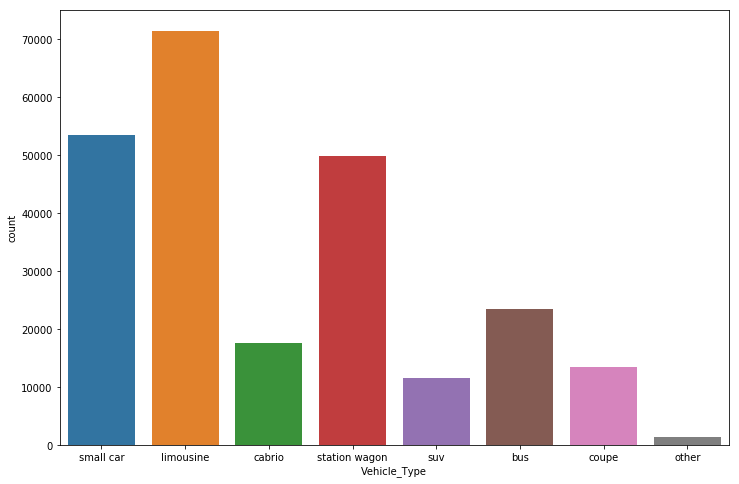

In [152]:
# Create countplot of Vehicle Type
# https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
plt.figure(figsize=(12,8))
sns.countplot(x= 'Vehicle_Type', data = autos_cleaned_data_df)
plt.savefig('Vehicle Type Frequency plot.pdf')

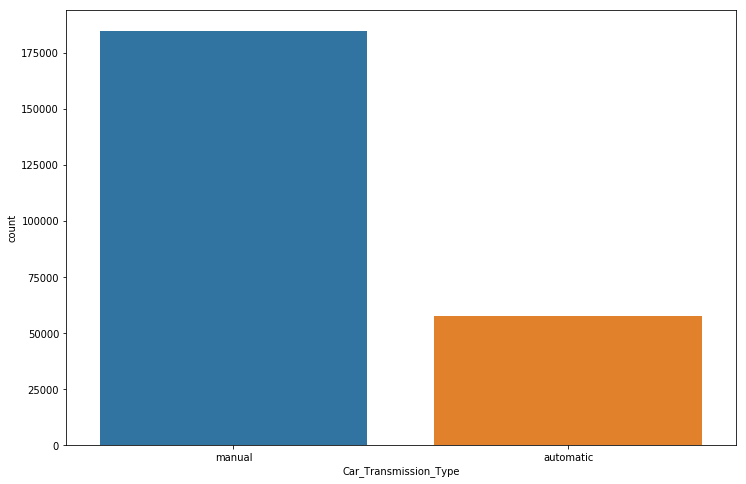

In [153]:
# Create countplot of Car_Transmission_Type
# https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
plt.figure(figsize=(12,8))
sns.countplot(x= 'Car_Transmission_Type', data = autos_cleaned_data_df)
plt.savefig('Car Transmission Type plot.pdf')

In [154]:
# Frequency counts of Fuel_Type
autos_cleaned_data_df['Fuel_Type'].value_counts()

gas                       155144
diesel                     82721
autogas                     3611
compressed natural gas       429
hybrid                       199
electric                      50
other                         48
Name: Fuel_Type, dtype: int64

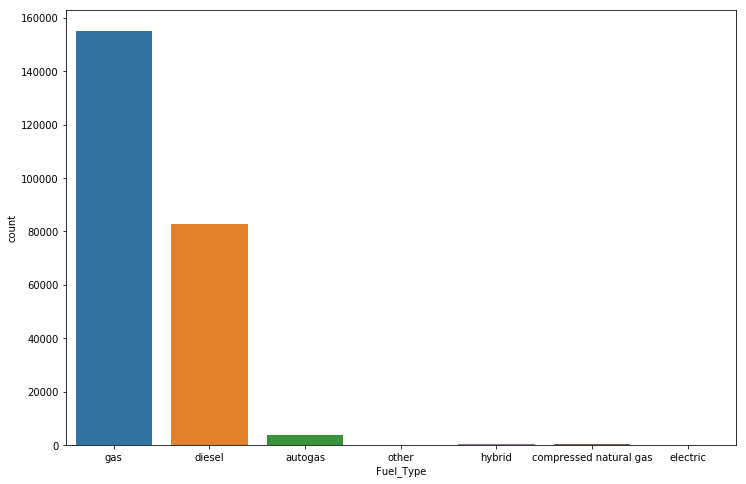

In [155]:
# Create countplot of Fuel_Type
# https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
plt.figure(figsize=(12,8))
sns.countplot(x= 'Fuel_Type', data = autos_cleaned_data_df)
plt.savefig('Fuel Type plot.pdf')

In [156]:
# Frequency counts of UnRepaired_Damage
autos_cleaned_data_df['UnRepaired_Damage'].value_counts()

no     219292
yes     22910
Name: UnRepaired_Damage, dtype: int64

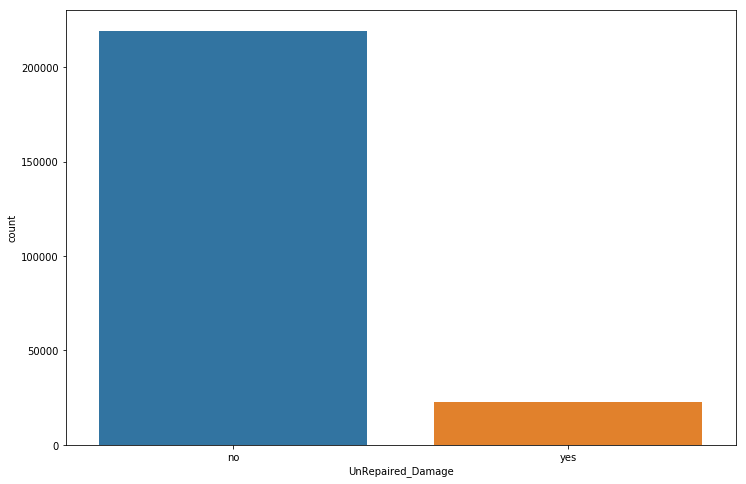

In [157]:
# Create countplot of UnRepaired_Damage
plt.figure(figsize=(12,8))
sns.countplot(x= 'UnRepaired_Damage', data = autos_cleaned_data_df)
plt.savefig('UnRepaired Damage plot.pdf')

In [158]:
# Frequency counts of the top 10 Car Models
autos_cleaned_data_df['Car_Model'].value_counts().nlargest(10)

golf        19618
other       18487
3er         14579
polo         7998
a4           7434
corsa        7403
passat       6999
astra        6991
5er          6487
c_klasse     6476
Name: Car_Model, dtype: int64

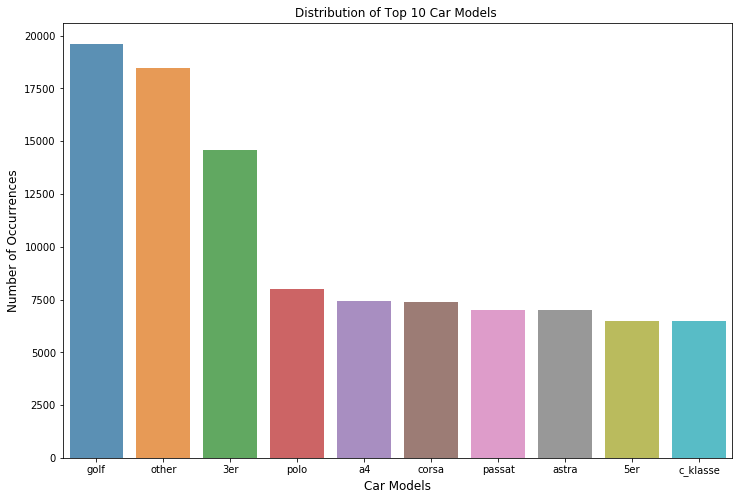

In [159]:
# https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts
# Plotting a bar graph of the top 10 Car Models

Car_Model_Count  = autos_cleaned_data_df['Car_Model'].value_counts()
Car_Model_Count = Car_Model_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Car_Model_Count.index, Car_Model_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Car Models ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Models', fontsize=12)
plt.savefig('Top 10 Car Models plot.pdf')
plt.show()

In [160]:
# Frequency counts of Car_Brand
autos_cleaned_data_df['Car_Brand'].value_counts().nlargest(10)

volkswagen       50437
bmw              28647
mercedes_benz    25143
opel             23877
audi             23516
ford             15884
renault          10369
peugeot           7285
fiat              5785
seat              4706
Name: Car_Brand, dtype: int64

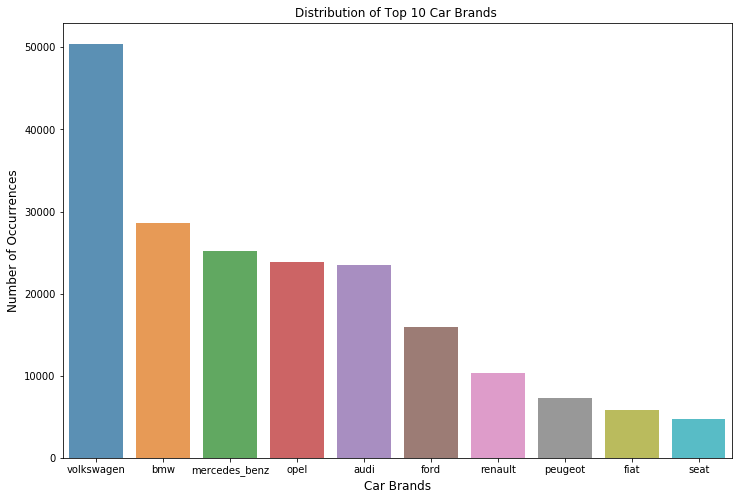

In [161]:
# https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts
# Plotting a bar graph of the top 10 Car Brands

Car_Brand_Count  = autos_cleaned_data_df['Car_Brand'].value_counts()
Car_Brand_Count = Car_Brand_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Car_Brand_Count.index, Car_Brand_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Car Brands ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Brands', fontsize=12)
plt.savefig('Top 10 Car Brands plot.pdf')
plt.show()

In [162]:
# Frequency counts of Car_Price in Euros
autos_cleaned_data_df['Car_Price'].value_counts().nlargest(10)

1500.0    3135
500.0     2880
2500.0    2700
1200.0    2587
3500.0    2507
1000.0    2306
4500.0    2089
999.0     1991
2000.0    1960
800.0     1938
Name: Car_Price, dtype: int64

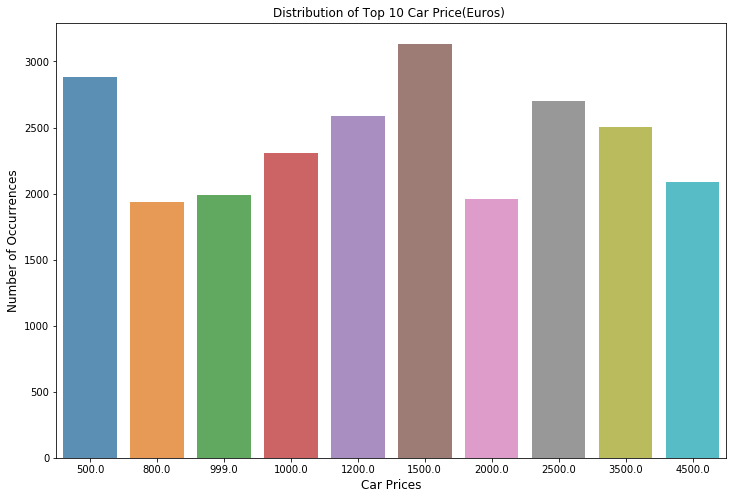

In [163]:
# https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts
# Plotting a bar graph of the top 10 Car Prices

Car_Price_Count = autos_cleaned_data_df['Car_Price'].value_counts()
Car_Price_Count = Car_Price_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Car_Price_Count.index, Car_Price_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Car Price(Euros) ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Prices', fontsize=12)
plt.savefig('Top 10 Car Prices plot.pdf')
plt.show()

C:\Users\Babawale Olatunji\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


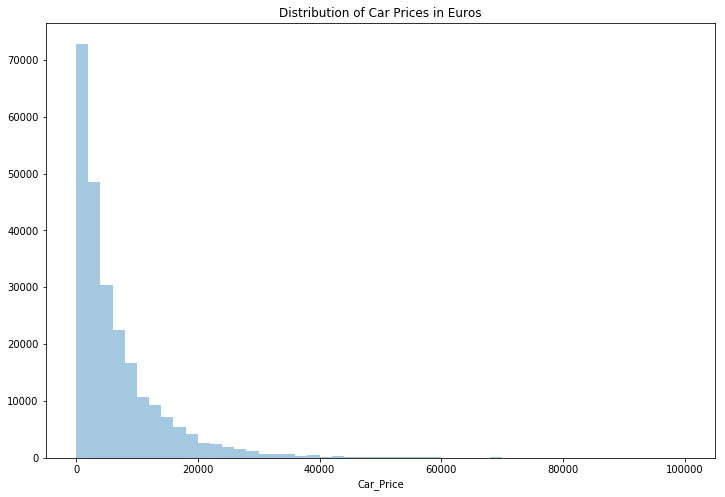

In [164]:
# Make default histogram of Car_Price(Euros)
plt.figure(figsize=(12,8))
sns.distplot( autos_cleaned_data_df['Car_Price'], kde=False )
plt.title('Distribution of Car Prices in Euros')
plt.show()


In [165]:
# Frequency counts of Car_Mileage_Kilometer
autos_cleaned_data_df['Car_Mileage_Kilometer'].value_counts().nlargest(10)

150000    147385
125000     27138
100000     11425
90000       9466
80000       8556
70000       7693
60000       7027
50000       6182
40000       5223
30000       4757
Name: Car_Mileage_Kilometer, dtype: int64

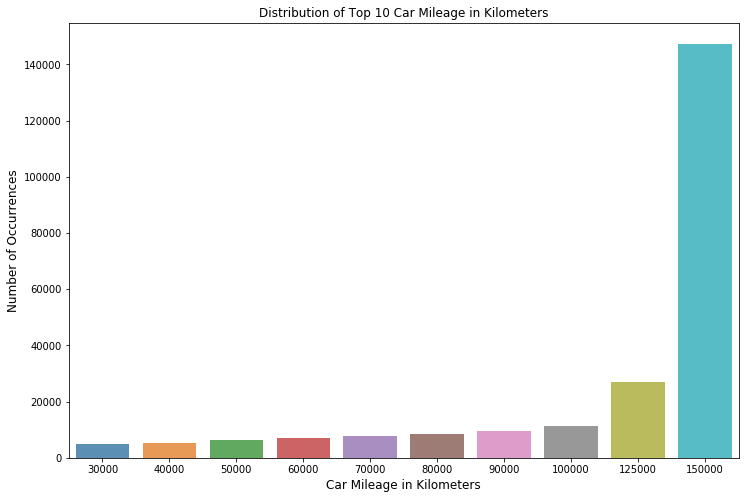

In [166]:
# https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts
# Plotting a bar graph of the top 10 Car Mileage in Kilometers

Car_Mileage_Kilometer_Count = autos_cleaned_data_df['Car_Mileage_Kilometer'].value_counts()
Car_Mileage_Kilometer_Count = Car_Mileage_Kilometer_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Car_Mileage_Kilometer_Count.index, Car_Mileage_Kilometer_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Car Mileage in Kilometers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Mileage in Kilometers', fontsize=12)
plt.savefig('Car Mileage plot.pdf')
plt.show()

In [167]:
# Frequency counts of Car_Engine_Power_PS
autos_cleaned_data_df['Car_Engine_Power_PS'].value_counts().nlargest(10)

75.0     15519
150.0    11343
140.0    10883
60.0     10087
116.0     9407
101.0     9368
170.0     8773
105.0     8302
90.0      8243
136.0     5161
Name: Car_Engine_Power_PS, dtype: int64

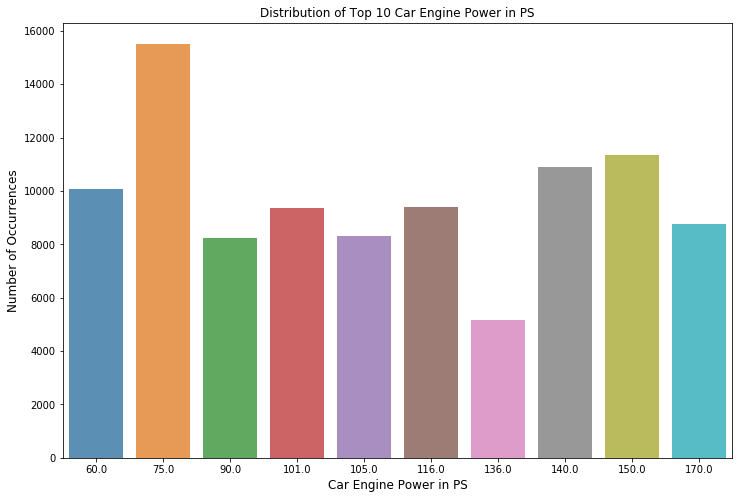

In [168]:
# https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts
# Plotting a bar graph of the top 10 Car Engine Power in PS

Car_Engine_Power_PS_Count = autos_cleaned_data_df['Car_Engine_Power_PS'].value_counts()
Car_Engine_Power_PS_Count = Car_Engine_Power_PS_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Car_Engine_Power_PS_Count.index, Car_Engine_Power_PS_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Car Engine Power in PS')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Engine Power in PS', fontsize=12)
plt.savefig('Car Engine Power plot.pdf')
plt.show()

In [169]:
# Frequency counts of Year_of_Car_Registration
autos_cleaned_data_df['Year_of_Car_Registration'].value_counts().nlargest(10)

2006    16164
2005    15135
2004    14775
2003    14499
1999    14297
2007    14256
2001    13737
2002    13594
2008    13428
2009    13254
Name: Year_of_Car_Registration, dtype: int64

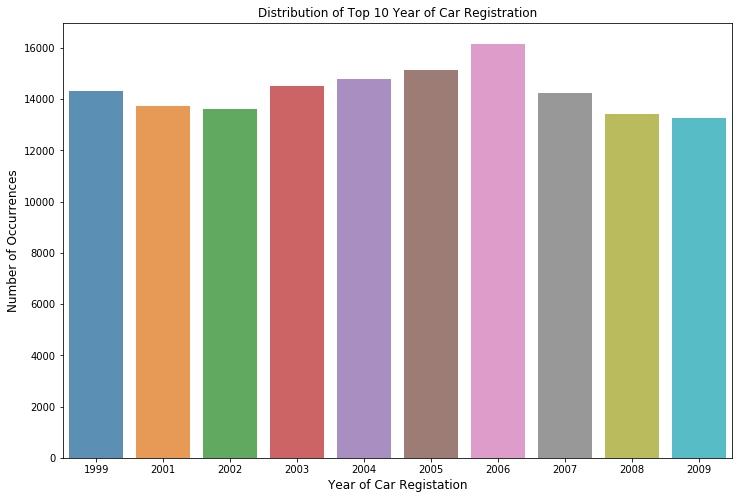

In [170]:
# https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts
# Plotting a bar graph of the top 10 Year of Car Registration
Year_of_Car_Registration_Count = autos_cleaned_data_df['Year_of_Car_Registration'].value_counts()
Year_of_Car_Registration_Count = Year_of_Car_Registration_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Year_of_Car_Registration_Count.index, Year_of_Car_Registration_Count.values, alpha=0.8)
plt.title('Distribution of Top 10 Year of Car Registration')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Year of Car Registation', fontsize=12)
plt.savefig('Top 10 Years of Car Registration plot.pdf')
plt.show()

In [171]:
# Frequency counts of Month_of_Car_Registration
autos_cleaned_data_df['Month_of_Car_Registration'].value_counts()


3     26933
6     23776
4     22509
5     21968
7     20712
10    19879
11    18460
9     18447
12    18221
1     17727
8     17078
2     16492
Name: Month_of_Car_Registration, dtype: int64

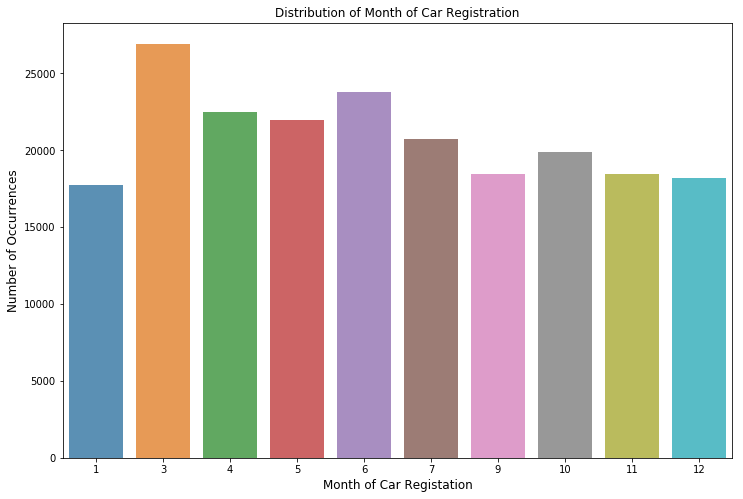

In [172]:
Month_of_Car_Registration_Count = autos_cleaned_data_df['Month_of_Car_Registration'].value_counts()
Month_of_Car_Registration_Count = Month_of_Car_Registration_Count[:10,]
plt.figure(figsize=(12,8))
sns.barplot(Month_of_Car_Registration_Count.index, Month_of_Car_Registration_Count.values, alpha=0.8)
plt.title('Distribution of Month of Car Registration')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Month of Car Registation', fontsize=12)
plt.savefig('Month of Car Registration plot.pdf')
plt.show()

## Correlation 

Essentially, correlation would facilitate undertanding of the relationships among the auto attributes, especially with the price of the car.

In [173]:
# Drop the string columns
autos_cleaned_data_df2 = autos_cleaned_data_df.drop(['Vehicle_Type','Car_Transmission_Type', 'Car_Model', 'Fuel_Type', 'Car_Brand', 'UnRepaired_Damage'], axis=1)

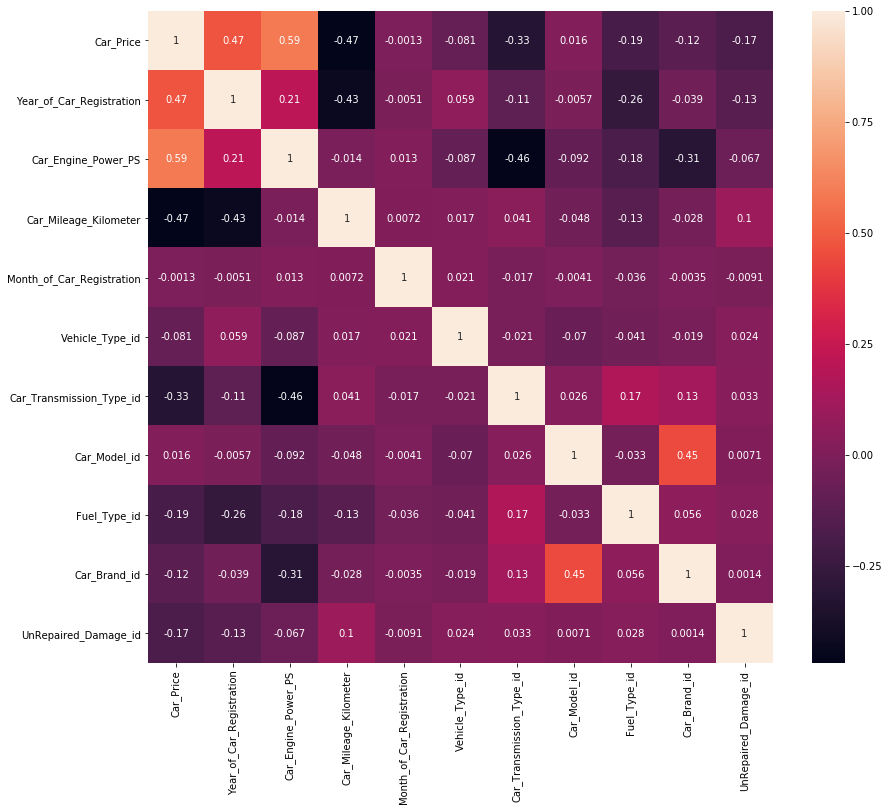

In [174]:
# Correlation of Data - Visualize potential relationship among the auto attributes
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(autos_cleaned_data_df2.corr(), annot=True)

In [175]:
# Correlation using .corr() method - Matrix table of relationship among the autos attributes
autos_cleaned_data_df2.corr()

,Car_Price,Year_of_Car_Registration,Car_Engine_Power_PS,Car_Mileage_Kilometer,Month_of_Car_Registration,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id
Car_Price,1.000000,0.474764,0.591456,-0.469760,-0.001346,-0.080578,-0.325680,0.015537,-0.193212,-0.123809,-0.171799
Year_of_Car_Registration,0.474764,1.000000,0.208647,-0.426956,-0.005148,0.059244,-0.113401,-0.005667,-0.264273,-0.039247,-0.128884
Car_Engine_Power_PS,0.591456,0.208647,1.000000,-0.014387,0.012757,-0.087092,-0.461485,-0.092213,-0.177564,-0.312963,-0.066848
Car_Mileage_Kilometer,-0.469760,-0.426956,-0.014387,1.000000,0.007208,0.016623,0.040771,-0.047579,-0.132804,-0.028241,0.103673
Month_of_Car_Registration,-0.001346,-0.005148,0.012757,0.007208,1.000000,0.021238,-0.017470,-0.004128,-0.036249,-0.003471,-0.009099
Vehicle_Type_id,-0.080578,0.059244,-0.087092,0.016623,0.021238,1.000000,-0.021085,-0.070339,-0.040644,-0.018853,0.024021
Car_Transmission_Type_id,-0.325680,-0.113401,-0.461485,0.040771,-0.017470,-0.021085,1.000000,0.025971,0.167968,0.127871,0.033147
Car_Model_id,0.015537,-0.005667,-0.092213,-0.047579,-0.004128,-0.070339,0.025971,1.000000,-0.032975,0.448459,0.007130
Fuel_Type_id,-0.193212,-0.264273,-0.177564,-0.132804,-0.036249,-0.040644,0.167968,-0.032975,1.000000,0.055583,0.027651
Car_Brand_id,-0.123809,-0.039247,-0.312963,-0.028241,-0.003471,-0.018853,0.127871,0.448459,0.055583,1.000000,0.001401


The above two outputs show the numerical and graphical charts that highlight 
the relationship among the attributes in the data.

## Compute the Age of Car in Months

In [176]:
#To select rows whose column value equals a scalar, some_value, use ==:
Count_Car_Registered_in_2016 = autos_cleaned_data_df2.loc[autos_cleaned_data_df2['Year_of_Car_Registration'] == 2016]
 

In [177]:
# Frequency Counts of Month_of_Car_Registration for Cars Registered in 2016
Count_Car_Registered_in_2016['Month_of_Car_Registration'].value_counts()

3     132
2      67
1      51
4      21
12      2
9       1
7       1
6       1
5       1
Name: Month_of_Car_Registration, dtype: int64

In [178]:
# Calculate the Age_Of_Car_Months based on Year_of_Car_Registration and Month_of_Car_Registration 

def compute_car_age(Registration_Year, Registration_Month):  
                            
    return (2016-Registration_Year)*12 +(12-Registration_Month)    #Allow Registration till December 2016                   
                                                                                          
autos_cleaned_data_df2['Age_Of_Car_Months'] = compute_car_age(autos_cleaned_data_df2['Year_of_Car_Registration'],autos_cleaned_data_df2['Month_of_Car_Registration'])  

In [179]:
autos_cleaned_data_df2.head(10)

,Car_Price,Year_of_Car_Registration,Car_Engine_Power_PS,Car_Mileage_Kilometer,Month_of_Car_Registration,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id,Age_Of_Car_Months
0,1500.0,2001,75.0,150000,6,5,1,117,4,37,0,186
1,3600.0,2008,69.0,90000,7,5,1,102,2,31,0,101
2,650.0,1995,102.0,150000,10,3,1,11,4,2,1,254
3,2200.0,2004,109.0,150000,8,1,1,8,4,25,0,148
4,2000.0,2004,105.0,150000,12,3,1,10,4,19,0,144
5,2799.0,2005,140.0,150000,12,6,1,171,2,37,1,132
6,17999.0,2011,190.0,70000,3,7,1,160,2,23,0,69
7,1750.0,2004,75.0,150000,2,5,0,227,4,27,0,154
8,7550.0,2007,136.0,150000,6,0,1,60,2,10,0,114
9,1850.0,2004,102.0,150000,1,0,1,33,4,20,0,155


In [180]:
# Drop Year_of_Car_Registration and Month_of_Car_Registration
autos_cleaned_data_df3 = autos_cleaned_data_df2.drop(['Year_of_Car_Registration','Month_of_Car_Registration'], axis=1)



In [181]:
autos_cleaned_data_df3.head(10)

,Car_Price,Car_Engine_Power_PS,Car_Mileage_Kilometer,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id,Age_Of_Car_Months
0,1500.0,75.0,150000,5,1,117,4,37,0,186
1,3600.0,69.0,90000,5,1,102,2,31,0,101
2,650.0,102.0,150000,3,1,11,4,2,1,254
3,2200.0,109.0,150000,1,1,8,4,25,0,148
4,2000.0,105.0,150000,3,1,10,4,19,0,144
5,2799.0,140.0,150000,6,1,171,2,37,1,132
6,17999.0,190.0,70000,7,1,160,2,23,0,69
7,1750.0,75.0,150000,5,0,227,4,27,0,154
8,7550.0,136.0,150000,0,1,60,2,10,0,114
9,1850.0,102.0,150000,0,1,33,4,20,0,155


In [182]:
# Create the numerical attributes dataframe
autos_num_attribs = autos_cleaned_data_df3.filter(['Car_Price', 'Car_Engine_Power_PS', 'Car_Mileage_Kilometer', 'Age_Of_Car_Months'], axis=1)

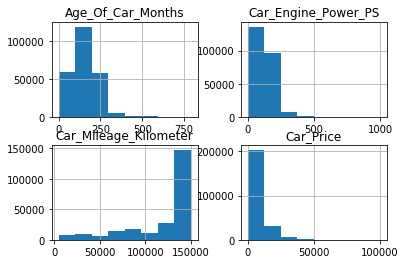

In [183]:
# Create the histogram of each of the column
num_attribs_hist = autos_num_attribs.hist(bins = 8)
plt.savefig('Histogram of Numeric Attributes.pdf')

In [184]:
# Create the categorical attributes dataframe
autos_cat_attribs = autos_cleaned_data_df3.filter(['Vehicle_Type_id', 'Car_Transmission_Type_id', 'Car_Model_id', 'Fuel_Type_id', 'Car_Brand_id', 'UnRepaired_Damage_id'], axis=1)

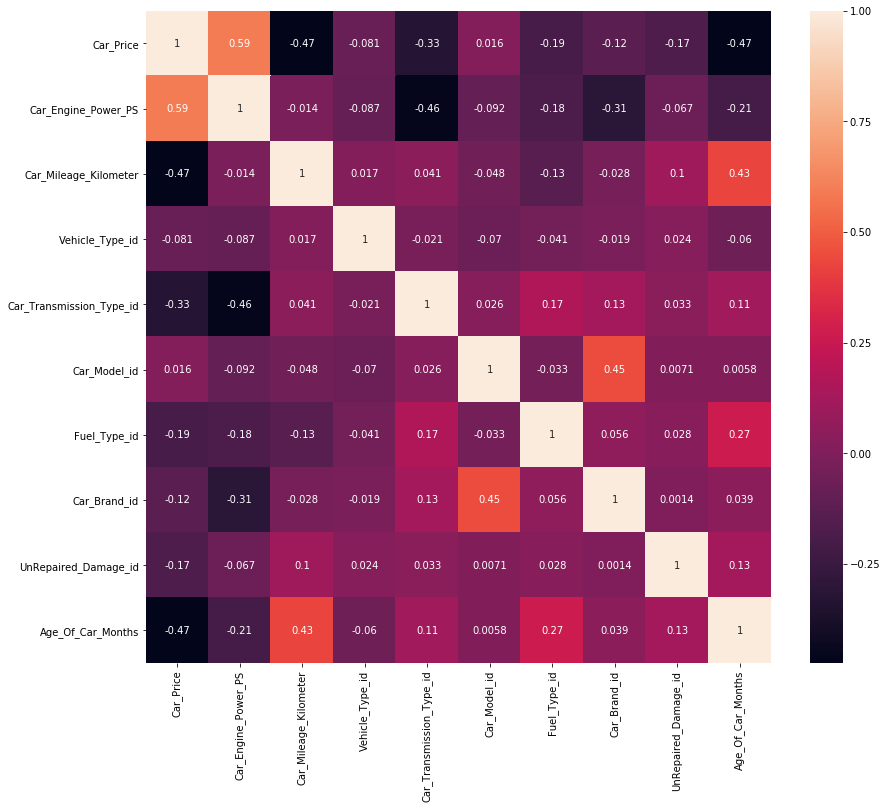

In [185]:
# Correlation of Data - Visualize potential relationship among the auto attributes
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(autos_cleaned_data_df3.corr(), annot=True)
plt.savefig('Correlation of Data.pdf')

In [186]:
# Correlation using .corr() method - Matrix table of relationship among the autos attributes
autos_cleaned_data_df3.corr()

,Car_Price,Car_Engine_Power_PS,Car_Mileage_Kilometer,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id,Age_Of_Car_Months
Car_Price,1.000000,0.591456,-0.469760,-0.080578,-0.325680,0.015537,-0.193212,-0.123809,-0.171799,-0.474352
Car_Engine_Power_PS,0.591456,1.000000,-0.014387,-0.087092,-0.461485,-0.092213,-0.177564,-0.312963,-0.066848,-0.209053
Car_Mileage_Kilometer,-0.469760,-0.014387,1.000000,0.016623,0.040771,-0.047579,-0.132804,-0.028241,0.103673,0.426321
Vehicle_Type_id,-0.080578,-0.087092,0.016623,1.000000,-0.021085,-0.070339,-0.040644,-0.018853,0.024021,-0.060135
Car_Transmission_Type_id,-0.325680,-0.461485,0.040771,-0.021085,1.000000,0.025971,0.167968,0.127871,0.033147,0.114085
Car_Model_id,0.015537,-0.092213,-0.047579,-0.070339,0.025971,1.000000,-0.032975,0.448459,0.007130,0.005844
Fuel_Type_id,-0.193212,-0.177564,-0.132804,-0.040644,0.167968,-0.032975,1.000000,0.055583,0.027651,0.265672
Car_Brand_id,-0.123809,-0.312963,-0.028241,-0.018853,0.127871,0.448459,0.055583,1.000000,0.001401,0.039370
UnRepaired_Damage_id,-0.171799,-0.066848,0.103673,0.024021,0.033147,0.007130,0.027651,0.001401,1.000000,0.129189
Age_Of_Car_Months,-0.474352,-0.209053,0.426321,-0.060135,0.114085,0.005844,0.265672,0.039370,0.129189,1.000000


The correlation results show a positive correlation of (0.59) between Car_Price and Car_Engine_Power_PS. 
That means an increase in Car-Engine_Power_PS would have an increase in the Car_Price. 
Conversely, there is negative correlation between Car_Mileage_Kilometer and Car_Price. 
Also, there is negative correlation between Age_of_Car_Months and Car_Price. 
It is a well-known fact the value of a car(Car_Price) decreases as the age of the car goes up.

<Figure size 720x576 with 0 Axes>

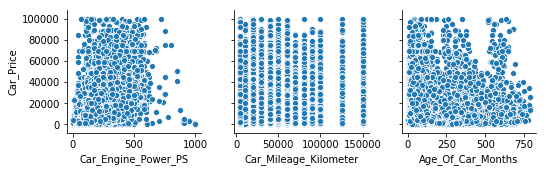

In [187]:
#Pair Plots between Car_Price and other numerical variables
plt.figure(figsize=(10,8))
pp = sns.pairplot(data=autos_cleaned_data_df3,
                  y_vars=['Car_Price'],
                  x_vars=['Car_Engine_Power_PS', 'Car_Mileage_Kilometer', 'Age_Of_Car_Months'])
plt.savefig('Car Price Pair Plots 1.pdf')

<Figure size 720x576 with 0 Axes>

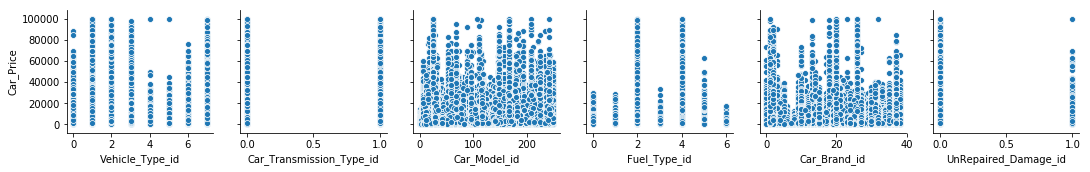

In [188]:
#Pair Plots between Car_Price and categeorical variables
plt.figure(figsize=(10,8))
pairplot_cat = sns.pairplot(data=autos_cleaned_data_df3,
                  y_vars=['Car_Price'],
                  x_vars=['Vehicle_Type_id', 'Car_Transmission_Type_id', 'Car_Model_id', 'Fuel_Type_id', 'Car_Brand_id', 'UnRepaired_Damage_id'])

plt.savefig('Car Price Pair Plots with Categorical Attributes.pdf')

## Training models

In [189]:
# Import the required libraries for the splitting the data and for model trainings
# Import train_test_split
from sklearn.model_selection import train_test_split

In [190]:
# import metrics for MAE, MSE and RMsE
from sklearn import metrics


In [191]:
# Separate the dataset into Predictors(Features or Inputs) and Target (Response Variable)
X = autos_cleaned_data_df3.drop('Car_Price', axis = 1 )
y = autos_cleaned_data_df3['Car_Price']

From the above, the dataset was split into training data and testing data. 
The training data is the data that the model would leverage for learning. 
While testing data is the data that would be leveraged to measure the performance of our models on unseen data.

In [192]:
X.head(10)

,Car_Engine_Power_PS,Car_Mileage_Kilometer,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id,Age_Of_Car_Months
0,75.0,150000,5,1,117,4,37,0,186
1,69.0,90000,5,1,102,2,31,0,101
2,102.0,150000,3,1,11,4,2,1,254
3,109.0,150000,1,1,8,4,25,0,148
4,105.0,150000,3,1,10,4,19,0,144
5,140.0,150000,6,1,171,2,37,1,132
6,190.0,70000,7,1,160,2,23,0,69
7,75.0,150000,5,0,227,4,27,0,154
8,136.0,150000,0,1,60,2,10,0,114
9,102.0,150000,0,1,33,4,20,0,155


In [193]:
y.head(10)

0     1500.0
1     3600.0
2      650.0
3     2200.0
4     2000.0
5     2799.0
6    17999.0
7     1750.0
8     7550.0
9     1850.0
Name: Car_Price, dtype: float64

In [194]:
# Split the data into training and test data sets using test size of 0.3 and random states of 42 (default value).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [195]:
# Display five lines of X_train
X_train.head()

,Car_Engine_Power_PS,Car_Mileage_Kilometer,Vehicle_Type_id,Car_Transmission_Type_id,Car_Model_id,Fuel_Type_id,Car_Brand_id,UnRepaired_Damage_id,Age_Of_Car_Months
52212,140.0,5000,7,1,167,4,24,0,14
122446,239.0,60000,7,0,180,2,1,0,85
191394,65.0,50000,5,1,210,0,3,0,52
150793,239.0,125000,7,0,221,2,37,0,65
210898,150.0,150000,5,1,103,4,10,0,113


In [196]:
# Display five lines of Y_train
y_train.head()

52212     21699.0
122446    12000.0
191394     5899.0
150793    28900.0
210898     5499.0
Name: Car_Price, dtype: float64

## Feature Selection

The performance of a machine learning model is greatly affected by feature selection. It's worth noting that 
model performance can be negatively affected by irrelevant or partially pertinent features. 
The process of manually or automatically selecting those features or input that contribute the most to 
the target or prediction variable is called Feature Selection. It minimizes overfitting, fosters 
prediction accuracy and minimizes training time.

To determine the important features for the output variable, univariate selection process was used in this project to identify relevant features(independent variables) that contribute the most to the target or output(dependent) variable.

In [203]:
# Import SelectKBest and Chisquare from Scikit Learn feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Leverage SelectKBest class to extract the top 9 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)
autos_dfscores = pd.DataFrame(fit.scores_)
autos_dfcolumns = pd.DataFrame(X.columns)

In [200]:
#Join both autos_dfscores & autos_dfcolumns dataframes for better visualization 
featureScores = pd.concat([autos_dfcolumns,autos_dfscores],axis=1)

In [202]:
#Assign columns to the dataframe
featureScores.columns = ['Features','Score'] 

# Display the 9 best features 
print(featureScores.nlargest(9,'Score'))  

                   Features         Score
1     Car_Mileage_Kilometer  8.683738e+08
8         Age_Of_Car_Months  3.773657e+06
0       Car_Engine_Power_PS  2.884651e+06
4              Car_Model_id  3.479805e+05
6              Car_Brand_id  9.487760e+04
7      UnRepaired_Damage_id  3.064678e+04
2           Vehicle_Type_id  1.088418e+04
5              Fuel_Type_id  8.850633e+03
3  Car_Transmission_Type_id  8.281381e+03


The above result identifies Car_Mileage_Kilometer, Age_Of_Car_Months, and Car_Engine_Power_PS as the three most 
important features in predicting the price of used cars. This is also consistent with the correlation result above. This result can be utilized to determine if certain features should be included in the models to be constructed using this dataset. For this project, I decided to utilized all these features in developing the models for predicting the price of used cars.

## Model Training 1 - Linear Regression

In [204]:
# Import SK Learn Linear Regression
from sklearn import linear_model

# Create an instance of Linear Regression model 
Linear_Regressor = linear_model.LinearRegression()

In [205]:
# Fit (that is Train) the training data to Linear Regression
Linear_Regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
# Display the value of the intercept
print(Linear_Regressor.intercept_)

14036.648652332395


In [208]:
# Display the values of the Coefficients for the features 
print(Linear_Regressor.coef_)

[ 6.75832558e+01 -8.11625812e-02 -1.51361368e+02 -7.08321904e+02
  3.12472745e+00 -8.46717214e+02  1.83566923e+01 -1.96024530e+03
 -1.65259954e+01]


It's worth noting that this is the list of coefficients for all the given features or independent variables to the train dataset.

In [212]:
# Create a DataFrame using columns from X (Features) as index and values of 
# the coefficients in a new column called Coefficient.
lm_coeff = pd.DataFrame(data = Linear_Regressor.coef_, index = X.columns, columns = ['Coefficients'])


In [213]:
# Display the DataFrame
print (lm_coeff)

                          Coefficients
Car_Engine_Power_PS          67.583256
Car_Mileage_Kilometer        -0.081163
Vehicle_Type_id            -151.361368
Car_Transmission_Type_id   -708.321904
Car_Model_id                  3.124727
Fuel_Type_id               -846.717214
Car_Brand_id                 18.356692
UnRepaired_Damage_id      -1960.245298
Age_Of_Car_Months           -16.525995


The coefficient of 67.58 for Car_Engine_Power_PS means if we keep all the coefficients constant, 
a one unit increase in the Car Engine Power is associated with 67.58 increase in the price of used car. 
The same interpretation applies to the other coefficients in the above result.
It's worth noting that negative sign (-) before the coefficient means the feature would have 
decrease effect on the used car price according to their coefficients.


In [328]:
# Produce Linear Regression Score value
Linear_Regressor.score(X_test,y_test)

0.6186392679313754

Linear Regression model gives prediction score of 62%. The score is the R squared value indicating the goodness of fit of the predicted used car prices to the true values. This R Squared would be used as one of the metrics in selecting the best model out of the four models developed in this project.


## Regression Prediction Metrics

R-Squared, MAE, MSE, and RMSE 

The R Squared is one of the metrics that can be used in evaluating regression model. R squared metric indicates the goodness of fit of the predicted values to the true values. In this project, this would mean the goodness of fit of the model predicted used car prices to the observed used car prices. R Squared Metric has a value between 0 and 1.

Mean Absolute Error(MAE), Mean Squared Error(MSE) and Root Mean Squared Error(RMSE) are the three frequently used metrics for estimating predictions on machine learning regression problems. These three are loss functions that need to be minimized.
MAE is the mean of the absolute difference between values(such as car price) predicted by a model or an estimator and true or observed values and is a linear score. 
MSE is the averaged squared difference between values predicted by a model or an estimator and observed values. 
RMSE is the square root of the mean of the squared errors (MSE) and is the commonly used measure.



In [216]:
# Let us see what the predictions are by providing the test data to the Linear Regression model
Linear_Regressor_pred = Linear_Regressor.predict(X_test)

In [217]:
# Display the first few lines of Numpy array
Linear_Regressor_pred[:10]

array([ 8125.42943322, -2230.62374277,  2430.50722635,  3728.20392063,
         -82.671306  , 22910.14417029,  1325.70893388, 19341.12785513,
        8913.45160697, 12406.79349645])

## R Squared Metric for Multiple Linear Regression

In [356]:
# Compute and Display R Squared Metric value 
# for Multiple Linear Regression Model
from sklearn.metrics import r2_score
print("R_Squared of MLR Model is: %0.2f" % (r2_score(y_test, Linear_Regressor_pred)))

R_Squared of MLR Model is: 0.62


Multiple linear regression model based on single split of 70:30 ratio produced R Squared value of 0.62.


## MAE, MSE and RMSE for Multiple Linear Regression

In [221]:
# Dislay MAE, MSE and RMSE for Linear Regression
print('MAE:', metrics.mean_absolute_error(y_test, Linear_Regressor_pred))
print('MSE:', metrics.mean_squared_error(y_test, Linear_Regressor_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,Linear_Regressor_pred)))

MAE: 3111.6998285111285
MSE: 24598349.6062194
RMSE: 4959.672328513185


The Multiple linear regression model based on a single split produced MAE metric value of 3111.70, 
MSE metric value of 24598349.60 and RMSE metric value of 4959.67.

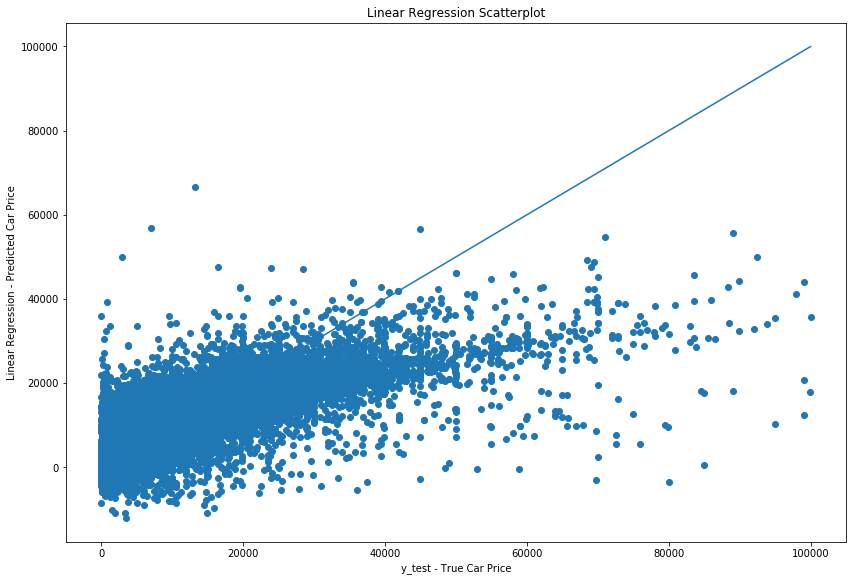

In [220]:
# create the Scatter plot of Linear Regression model
plt.figure(figsize=(12,8))
plt.scatter(y_test, Linear_Regressor_pred)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Linear Regression - Predicted Car Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
plt.title('Linear Regression Scatterplot')
plt.savefig('Linear Regression Scatterplot.pdf')


The above depicts the scatterplot of the linear regression model predicted car prices versus 
the observed or true car prices. The scatterplot visually highlights how R-squared values denote the scatter around the regression line.

## Model Training 1 – Cross Validation

The train-test split based on one split is referred as classical approach. 
More than one split is done in cross-validation. In this project, I utilized 10 splits in cross validation. 
These splits are called Folds. Cross-Validation provides a better understanding of what is 
going on by training 10 different models. Cross-Validation would reveal consistency in 
performance of the algorithm and data or reveal inconsistency for further investigation. 
Furthermore, cross-validation would ensure similar performance in production deployment of this model.

In [261]:
# import cross validation score
from sklearn.model_selection import cross_val_score

In [262]:
# Compute Prediction score of Multiple Linear Regression model on the dataset by splitting the data and 
# calculating the score 10 consecutive times with different splits each time
LR_Scores = cross_val_score(Linear_Regressor, X, y,cv=10)

This would run the Multiple Linear Regression with the input or features data and output or target data ten times, 
and measure the score each time.

## R Squared 10-Times Results for Multiple Linear Regression with Cross Validation

In [263]:
# Display the Scores - R Squared displayed 10 Times
LR_Scores

array([0.61292635, 0.61918727, 0.62321723, 0.60366085, 0.62024098,
       0.61992556, 0.61882844, 0.6008811 , 0.62021083, 0.60151036])

In [329]:
# Calculate the mean or average score of the 10 different models
LR_Score = cross_val_score(Linear_Regressor, X, y,cv=10).mean() * 100
print("Average Score of Multiple Linear Regression Model is: " , LR_Score)


Average Score of Multiple Linear Regression Model is:  61.405889937435035


In [330]:
## Calculate the mean or average prediction score and standard deviation
print("Average Score of Multiple Linear Regression is: %0.2f (+/- %0.2f)" % (LR_Scores.mean(), LR_Scores.std() * 2))

Average Score of Multiple Linear Regression is: 0.61 (+/- 0.02)


The Average Score of Multiple Linear Regression Model leveraging Cross Validation is statistically 
the same as the one obtained from the classical approach of single train/test data split. 
From the classical approach above, 62% Score was produced.

mean() function above is used to find the mean of the 10 values while std() function is used to 
find the standard deviation of the 10 values.


In [266]:
# Obtaining predictions by cross-validation cross_val_predict function
# cross_val_predict returns for each element in the input or features data the prediction that was 
# produced for that element when it was in the test set import cross_val_predict
from sklearn.model_selection import cross_val_predict
lr_cross_val_y_pred = cross_val_predict(Linear_Regressor, X, y, cv=10)


In [267]:
# Display the first few lines of Numpy array
lr_cross_val_y_pred[:10]

array([   89.31460667,  7410.14036967, -1858.04381904,  3080.07193975,
        2450.44804176,  5120.34496456, 17476.18009015,  1417.69811888,
        7146.03723636,  2617.14173911])

## R Squared for Multiple Linear Regression with Cross Validation

In [339]:
# Multiple Linear Regression with Cross Validation R Squared Metric.
# R Squared has a value between 0 and 1
# Determine the goodness of fit of predicted used car prices to the true values.
LR_RSquared_results = cross_val_score(Linear_Regressor, X, y, cv=10, scoring='r2')
print("R Squared of MLR with Cross Validation is: %0.2f (+/- %0.2f)" % (LR_RSquared_results.mean(), LR_RSquared_results.std() * 2))

R Squared of MLR with Cross Validation is: 0.61 (+/- 0.02)


Multiple linear regression with Cross Validation model based on 10 fold splits produced R Squared value of 0.61.

## MAE, MSE and RMSE for Multiple Linear Regression with Cross Validation

In [268]:
# Cross Validation Linear Regression MAE
LR_MAE_results = cross_val_score(Linear_Regressor, X, y, cv=10, scoring='neg_mean_absolute_error')
# Cross Validation Linear Regression MSE and RMSE
LR_MSE_results = cross_val_score(Linear_Regressor, X, y, cv=10, scoring='neg_mean_squared_error')

print("MAE of Multiple Linear Regression is: %0.2f (+/- %0.2f)" % (LR_MAE_results.mean(), LR_MAE_results.std() * 2))
print("MSE of Multiple Linear Regression is: %0.2f (+/- %0.2f)" % (LR_MSE_results.mean(), LR_MSE_results.std() * 2))
print("RMSE of MLR is: %0.2f (+/-)" % (np.sqrt(-(LR_MSE_results.mean()))), np.sqrt(LR_MSE_results.std() * 2))


MAE of Multiple Linear Regression is: -3107.03 (+/- 52.32)
MSE of Multiple Linear Regression is: -25159001.57 (+/- 1674664.20)
RMSE of MLR is: 5015.87 (+/-) 1294.088174183713


The Mean Square Error (MSE) returned by Scikit Learn Cross Validation cross_val_score is always a negative. 
Hence, the absolute value should be taken or make the negative sign positive before taking the square root to calculate RMSE. Also, the negative sign before MAE and MSE results should be ignored when using these metrics for presentation or description.

Multiple Linear Regression model with cross validation produced MAE metric value of 3107.03, MSE metric value of 25159001.57 and RMSE metric value of 5015.87. 

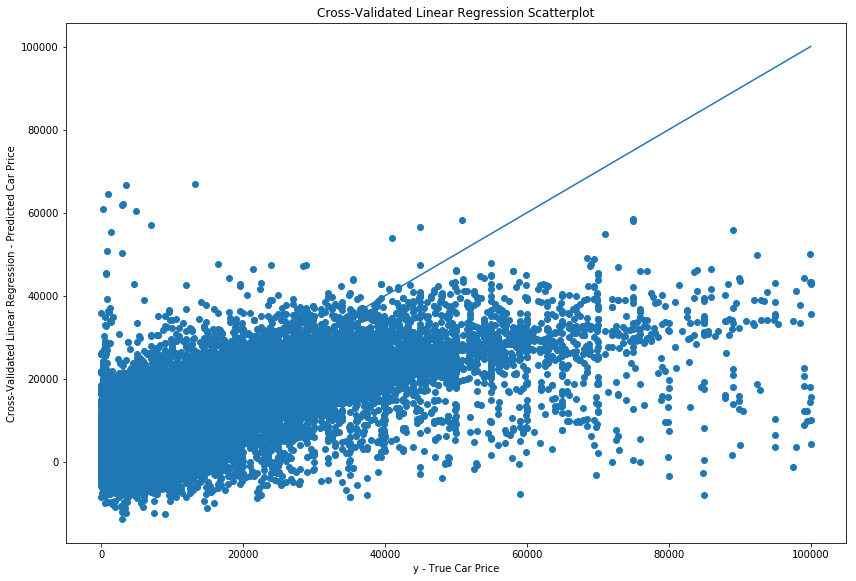

In [270]:
# Create Cross-Validation Scatter Plot of Linear Regression model
plt.figure(figsize=(12,8))
plt.scatter(y, lr_cross_val_y_pred)
plt.xlabel('y - True Car Price')
plt.ylabel('Cross-Validated Linear Regression - Predicted Car Price')
plt.plot([min(y), max(y)], [min(y), max(y)])
plt.tight_layout()
plt.title('Cross-Validated Linear Regression Scatterplot')
plt.savefig('Cross-Validated Linear Regression Scatterplot.pdf')

The above depicts the scatterplot of linear regression model with cross validation predicted car prices versus 
the observed or true car prices. The scatterplot visually highlights how R-squared values denote the scatter around the regression line.

# Model Training 2 - Decision Tree

Decision Tree Regression Model is the second model constructed for this project.
It trains a model in a flowchart-like tree structure to predict data in the future.

In [271]:
# Import SK Learn Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree Regressor instance 
Tree_Regressor = DecisionTreeRegressor(random_state=42)


In [272]:
# Fit (that is Train) the training data to Decision Tree Regressor
Tree_Regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [277]:
# Produce Decision Tree Regressor Score value
Tree_Regressor.score(X_test,y_test)

0.8186468753095089

Decision Tree Regression model gives us prediction score value of 82%. The measure of a regression model is based on how correctly its predicted values match up against observed or true values.

## Decision Tree Regression Prediction Metrics

In [278]:
# Let us see what the predictions are by providing the test data to the Decision Tree Regression model
Tree_Regressor_pred = Tree_Regressor.predict(X_test)


In [279]:
# Display the first few lines of Numpy array
Tree_Regressor_pred[:10]

array([ 9000.        ,   500.        ,  2950.        ,   980.        ,
         675.        , 27225.        ,  1583.33333333, 31650.        ,
        1200.        , 11000.        ])

## R Squared Metric for Decision Tree Regression Model

In [341]:
# Compute and Display R Squared Metric value 
# for Decision Tree Regression Model
from sklearn.metrics import r2_score
print("R_Squared of Decision Tree Regression Model is: %0.2f" % (r2_score(y_test, Tree_Regressor_pred)))

R_Squared of Decision Tree Regression Model is: 0.82


Decision Tree regression model based on a single split with 70:30 ratio produced R Squared value of 0.82.

## MAE, MSE and RMSE for Decision Tree Regression Model

In [280]:
# Dislay MAE, MSE and RMSE for Decision Tree Regression model
print('MAE:', metrics.mean_absolute_error(y_test, Tree_Regressor_pred))
print('MSE:', metrics.mean_squared_error(y_test, Tree_Regressor_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,Tree_Regressor_pred)))

MAE: 1520.8651744667957
MSE: 11697553.492513902
RMSE: 3420.1686350988457


The Decision Tree regression model based on a single split produced MAE metric value of 1520.87, 
MSE metric value of 11697553.49 and RMSE metric value of 3420.17.

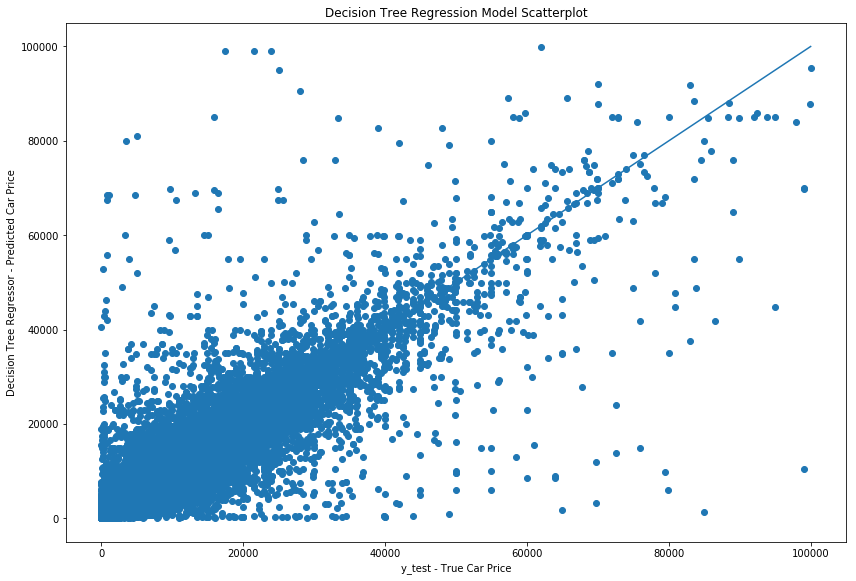

In [281]:
# create the Scatter plot of Decision Tree Regression model
plt.figure(figsize=(12,8))
plt.scatter(y_test, Tree_Regressor_pred)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Decision Tree Regressor - Predicted Car Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
plt.title('Decision Tree Regression Model Scatterplot')
plt.savefig('Decision Tree Regression Model Scatterplot.pdf')


The above depicts the scatterplot of decision tree regression predicted car prices versus the observed 
or true car prices.

## Model Training 2 – Cross Validation

For Decision Tree Regression Model, more than one split is done in cross validation. Cross Validation would 
reveal consistency in performance of this algorithm and data or reveal inconsistency for further investigation.

In [282]:
# Compute Prediction score of Decision Tree Regression on the dataset by splitting the data and 
# calculating the score 10 consecutive times with different splits each time
DT_Scores = cross_val_score(Tree_Regressor, X, y, cv=10)

This would run the Decision Tree Regression with the input or features data and output or target data ten times, 
and measure the score each time.

## R Squared 10-Times Results for Decision Tree Regression with Cross Validation

In [284]:
# Display the Decision Tree Scores - R Squared displayed 10 Times
DT_Scores

array([0.84555137, 0.82333233, 0.84243773, 0.82563577, 0.82750548,
       0.82199883, 0.86050558, 0.83059229, 0.84220137, 0.83837112])

In [342]:
# Calculate the mean or average score of the 10 different models
DT_Score = cross_val_score(Tree_Regressor, X, y, cv=10).mean() * 100
print("Average Score of Decision Tree Regression Model is: " , DT_Score)

Average Score of Decision Tree Regression Model is:  83.58131870222314


In [343]:
## Calculate the mean or average decision tree score and standard deviation
print("Average Score of Decision Tree Regression Model is: %0.2f (+/- %0.2f)" % (DT_Scores.mean(), DT_Scores.std() * 2))

Average Score of Decision Tree Regression Model is: 0.84 (+/- 0.02)


In [287]:
# Obtaining predictions by cross-validation cross_val_function
# cross_val_function returns for each element in the input or features data the prediction that was produced for that element when it was in the test set.
# import cross_val_predict
from sklearn.model_selection import cross_val_predict
DT_cross_val_y_pred = cross_val_predict(Tree_Regressor, X, y, cv=10)

In [288]:
# Display the first few lines of Numpy array
DT_cross_val_y_pred[:10]

array([ 1374.5       ,  4799.        ,   400.        ,  3045.        ,
        2990.        ,  4000.        , 17999.        ,  1719.8       ,
        5500.        ,  1866.66666667])

## R Squared for Decision Tree Regression with Cross Validation

In [344]:
# Decision Tree Regression with Cross Validation R Squared Metric.
# R Squared has a value between 0 and 1
# Determine the goodness of fit of predicted used car prices to the true values.
DT_RSquared_results = cross_val_score(Tree_Regressor, X, y, cv=10, scoring='r2')
print("R Squared of DTR with Cross Validation Model is: %0.2f (+/- %0.2f)" % (DT_RSquared_results.mean(), DT_RSquared_results.std() * 2))


R Squared of DTR with Cross Validation Model is: 0.84 (+/- 0.02)


## MAE, MSE, and RMSE for Decision Tree Regression with Cross Validation

In [289]:
# Cross Validation Decision Tree Regression MAE
DT_MAE_results = cross_val_score(Tree_Regressor, X, y, cv=10, scoring='neg_mean_absolute_error')

# Cross Validation Decision Tree MSE and RMSE
DT_MSE_results = cross_val_score(Tree_Regressor, X, y, cv=10, scoring='neg_mean_squared_error')

print("MAE of Decision Tree Regression is: %0.2f (+/- %0.2f)" % (DT_MAE_results.mean(), DT_MAE_results.std() * 2))
print("MSE of Decision Tree Regression is: %0.2f (+/- %0.2f)" % (DT_MSE_results.mean(), DT_MSE_results.std() * 2))
print("RMSE of DTR is: %0.2f (+/-)" % (np.sqrt(-(DT_MSE_results.mean()))), np.sqrt(DT_MSE_results.std() * 2))

MAE of Decision Tree Regression is: -1448.99 (+/- 39.34)
MSE of Decision Tree Regression is: -10702669.73 (+/- 1601813.69)
RMSE of DTR is: 3271.49 (+/-) 1265.627783201991


Better results were produced for Decision Tree Regression Model with Cross Validation.

The Mean Square Error (MSE) returned by Scikit Learn Cross Validation cros_val_score is always a negative. 
Hence, the absolute value should be taken or make the negative sign positive before taking the square root to calculate RMSE. Also, the negative sign before MAE and MSE results should be ignored when using these metrics for presentation or description.

Decision tree regression model with cross validation produced MAE metric value of 1448.99, 
MSE metric value of 10702669.73 and RMSE metric value of 3271.49. 

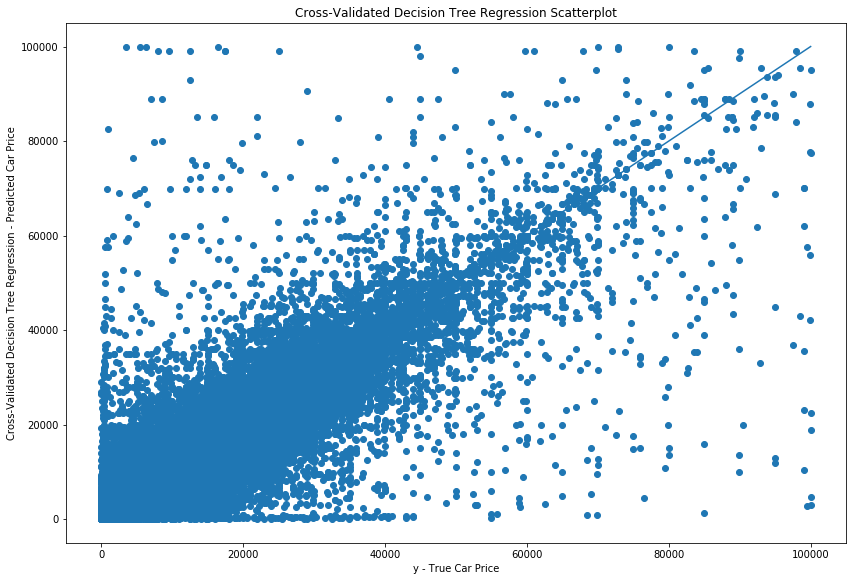

In [290]:
# Create Scatter Plot of Decision Tree Regression model with Cross-Validation
plt.figure(figsize=(12,8))
plt.scatter(y, DT_cross_val_y_pred)
plt.xlabel('y - True Car Price')
plt.ylabel('Cross-Validated Decision Tree Regression - Predicted Car Price')
plt.plot([min(y), max(y)], [min(y), max(y)])
plt.tight_layout()
plt.title('Cross-Validated Decision Tree Regression Scatterplot')
plt.savefig('Cross-Validated Decision Tree Regression Scatterplot.pdf')

The above depicts the scatterplot of decision tree regression model with cross validation 
predicted car prices versus the observed or true car prices.


# Model Training 3 - Random Forest Regressor


This is the third model constructed in this regression problem project. 
It is an ensemble method and it combines multiple decision trees in determining the final output.

In [293]:
# Import SK Learn Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Regressor instance 
Rd_forest_Regressor = RandomForestRegressor(random_state=42)


In [294]:
# Fit (that is Train) the training data to Random Forest Regressor
Rd_forest_Regressor.fit(X_train, y_train)

C:\Users\Babawale Olatunji\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [295]:
# Produce Random Forest Regressor Score value
Rd_forest_Regressor.score(X_test, y_test)

0.8890868687326233

Random Forest Regression model gives us prediction score of 89%. It should be noted that the measure of a regression model is based on how correctly its predicted values match up against observed or true values.


## Random Forest Regression Prediction Metrics

In [296]:
# Let us see what the predictions are by providing the test data to the 
# Random Forest Regressor model
Rd_forest_Regressor_pred = Rd_forest_Regressor.predict(X_test)

In [297]:
# Display the first few lines of Numpy array
Rd_forest_Regressor_pred[:10]

array([ 8976.66666667,  1214.9       ,  2418.96666667,   919.11666667,
         832.25      , 26887.31666667,  1869.03571429, 24678.8       ,
        1794.9       , 10886.        ])

## R Squared Metric for Random Forest Regression Model 

In [345]:
# Compute and Display R Squared Metric value 
# for Random Forest Regression Model
from sklearn.metrics import r2_score
print("R_Squared for Random Forest Regression Model is: %0.2f" % (r2_score(y_test, Rd_forest_Regressor_pred)))

R_Squared for Random Forest Regression Model is: 0.89


Random Forest regression model based on single split with 70:30 ratio produced R Squared value of 0.89.

## MAE, MSE and RMSE for Random Forest Regression Model

In [298]:
# Dislay MAE, MSE and RMSE for Random Forest Regressor
print('MAE:', metrics.mean_absolute_error(y_test, Rd_forest_Regressor_pred))
print('MSE:', metrics.mean_squared_error(y_test, Rd_forest_Regressor_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,Rd_forest_Regressor_pred)))

MAE: 1288.38336720473
MSE: 7154066.3456259845
RMSE: 2674.7086468671655


Random Forest regression model based on a single split produced MAE metric value of 1288.38, 
MSE metric value of 7154066.35 and RMSE metric value of 2674.71.

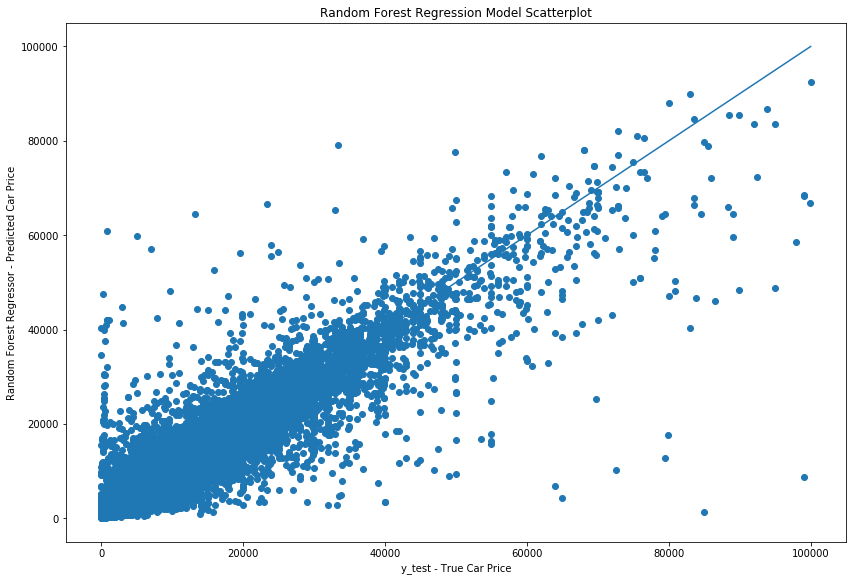

In [299]:
# create the Scatter plot of Random Forest Regressor model
plt.figure(figsize=(12,8))
plt.scatter(y_test, Rd_forest_Regressor_pred)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Random Forest Regressor - Predicted Car Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
plt.title('Random Forest Regression Model Scatterplot')
plt.savefig('Random Forest Regression Model Scatterplot.pdf')



The above depicts the scatterplot of random forest regression model predicted car prices versus 
the observed or true car prices.

## Model Training 3 - Cross Validation

For Random Forest Regression Model, more than one split is done in cross validation. 
Cross Validation would reveal consistency in performance of this algorithm and data or 
reveal inconsistency for further investigation.

In [300]:
# Compute Prediction score of Random Forest Regression on the dataset by splitting the data and 
# calculating the score 10 consecutive times with different splits each time
RF_Scores = cross_val_score(Rd_forest_Regressor, X, y, cv=10)

This would run the Random Forest Regression with the input or features data and 
output or target data ten times, and measure the score each time.

## R Squared 10-Times Results for Random Forest Regression with Cross Validation

In [301]:
# Display the Random Forest Scores - R Squared displayed 10 Times
RF_Scores

array([0.89695932, 0.89039955, 0.89793221, 0.87976563, 0.89272822,
       0.89830128, 0.9052453 , 0.89243783, 0.8941638 , 0.89474127])

In [348]:
# Calculate the mean or average score of the 10 different models
RF_Score = cross_val_score(Rd_forest_Regressor, X, y, cv=10).mean() * 100
print("Average Score of Random Forest Regression Model is: " , RF_Score)

Average Score of Random Forest Regression Model is:  89.4267441324545


In [349]:
## Calculate the mean or average random forest prediction score and standard deviation
print("Average Score of Random Forest Regression Model is: %0.2f (+/- %0.2f)" % (RF_Scores.mean(), RF_Scores.std() * 2))

Average Score of Random Forest Regression Model is: 0.89 (+/- 0.01)


It's worth noting that the score is the R squared value indicating the goodness of 
fit of the predicted used car prices to the true values.

In [304]:
# Obtaining predictions by cross-validation cross_val_function
# cross_val_function returns for each element in the input or features data the prediction that was produced for 
# that element when it was in the test set.
# import cross_val_predict
from sklearn.model_selection import cross_val_predict
RF_cross_val_y_pred = cross_val_predict(Rd_forest_Regressor, X, y, cv=10)


In [305]:
# Display the first few lines of Numpy array
RF_cross_val_y_pred[:10]

array([ 1762.03653846,  5294.4       ,   463.65      ,  3027.06666667,
        2892.33333333,  4470.        , 16929.1       ,  1368.11928571,
        5267.        ,  1875.83333333])

## R Squared for Random Forest Regression with Cross Validation

In [351]:
# Random Forest Regression with Cross Validation R Squared Metric.
# R Squared has a value between 0 and 1
# Determine the goodness of fit of predicted used car prices to the true values.
RF_RSquared_results = cross_val_score(Rd_forest_Regressor, X, y, cv=10, scoring='r2')
print("R Squared of RF Regression with Cross Validation Model is: %0.2f (+/- %0.2f)" % (RF_RSquared_results.mean(), RF_RSquared_results.std() * 2))


R Squared of RF Regression with Cross Validation Model is: 0.89 (+/- 0.01)


## MAE, MSE, and RMSE for Random Forest Regression with Cross Validation 

In [306]:
# Cross Validation Random Forest Regression MAE
RF_MAE_results = cross_val_score(Rd_forest_Regressor, X, y, cv=10, scoring='neg_mean_absolute_error')

# Cross Validation Random Forest MSE and RMSE
RF_MSE_results = cross_val_score(Rd_forest_Regressor, X, y, cv=10, scoring='neg_mean_squared_error')

print("MAE of Random Forest Regression is: %0.2f (+/- %0.2f)" % (RF_MAE_results.mean(), RF_MAE_results.std() * 2))
print("MSE of Random Forest Regression is: %0.2f (+/- %0.2f)" % (RF_MSE_results.mean(), RF_MSE_results.std() * 2))
print("RMSE of RFR is: %0.2f (+/-)" % (np.sqrt(-(RF_MSE_results.mean()))), np.sqrt(RF_MSE_results.std() * 2))

MAE of Random Forest Regression is: -1249.78 (+/- 33.84)
MSE of Random Forest Regression is: -6895795.87 (+/- 1003504.72)
RMSE of RFR is: 2625.98 (+/-) 1001.7508266861528


The Mean Square Error (MSE) returned by Scikit Learn Cross Validation cros_val_score is always a negative. Hence, the absolute value should be taken or make the negative sign positive before taking the square root to calculate RMSE. Also, the negative sign before MAE and MSE results should be ignored when using these metrics for presentation or description.

Random Forest Regression model with cross validation produced MAE metric value of 1249.78, 
MSE metric value of 6895795.87 and RMSE metric value of 2625.98. 

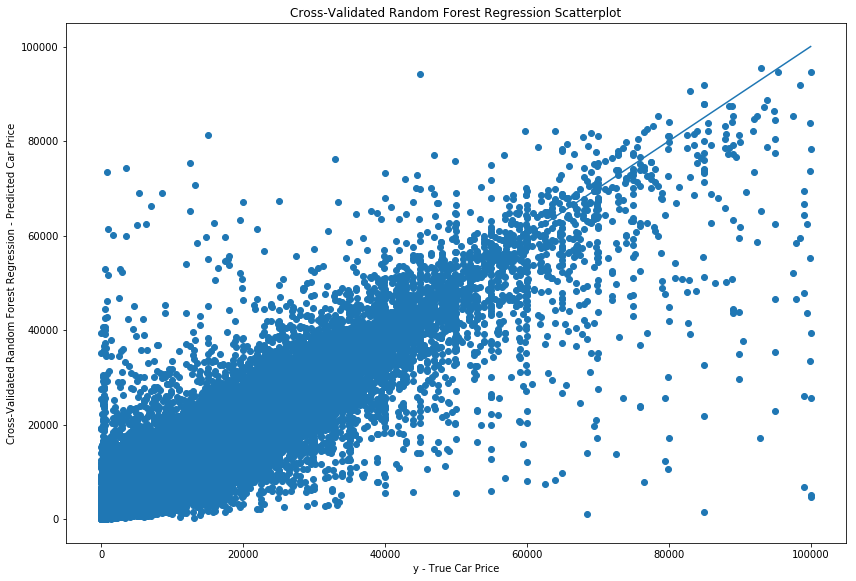

In [307]:
# Create Scatter Plot of Random Forest Regression model with Cross-Validation
plt.figure(figsize=(12,8))
plt.scatter(y, RF_cross_val_y_pred)
plt.xlabel('y - True Car Price')
plt.ylabel('Cross-Validated Random Forest Regression - Predicted Car Price')
plt.plot([min(y), max(y)], [min(y), max(y)])
plt.tight_layout()
plt.title('Cross-Validated Random Forest Regression Scatterplot')
plt.savefig('Cross-Validated Random Forest Regression Scatterplot.pdf')

The above depicts the scatterplot of random forest regression model with cross validation predicted car prices 
versus the observed or true car prices.

## Model Training 4 - Ensemble Voting Regressor Model

The three individual models including Linear Regression model, Decision Tree Regression model 
and Random Forest Regression model have been developed above. The next step is to develop a voting regressor model
that would leverage the strength of these regressors.


In [308]:
# import sk Learn VotingRegressor
from sklearn.ensemble import VotingRegressor

In [309]:
# Create a dictionary of the first three regression models
estimators = [('linear_reg', Linear_Regressor), ('tree_reg', Tree_Regressor), ('forest_reg', Rd_forest_Regressor)]


In [310]:
# Create voting regressor, inputting the first three regression models
ensemble = VotingRegressor(estimators)

In [311]:
# Fit model to training data
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('tree_reg',
                             DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=F...
                            ('forest_reg

In [312]:
#Test Ensemble model on the test data
ensemble.score(X_test,y_test)

0.8618224688754966

Voting Regressor model gives prediction score of 86%. It is worth noting that the measure of a regression model is 
based on how correctly its predicted values match up against observed or true values.

## Voting Regressor Prediction Metrics

In [314]:
# Let us see what the predictions are by providing the test data to the Ensemble model
ensemble_pred = ensemble.predict(X_test)


In [315]:
# Display the first few lines of Numpy array
ensemble_pred[:10]


array([ 8700.69869996,  -171.90791426,  2599.82463101,  1875.7735291 ,
         474.85956467, 25674.15361232,  1592.6926605 , 25223.30928504,
        3969.45053566, 11430.93116548])

## R Squared Metric for Ensemble Voting Regressor Model

In [352]:
# Compute and Display R Squared Metric value 
# for Ensemble Voting Regressor Model
from sklearn.metrics import r2_score
print("R_Squared of Ensemble Voting Regressor Model is: %0.2f" % (r2_score(y_test,ensemble_pred)))

R_Squared of Ensemble Voting Regressor Model is: 0.86


Ensemble Voting Regressor model based on a single split with 70:30 ratio produced R Squared value of 0.86.  

## MAE, MSE and RMSE for Ensemble Voting Regressor Model

In [316]:
# Dislay MAE, MSE and RMSE for ensemble model
print('MAE:', metrics.mean_absolute_error(y_test, ensemble_pred))
print('MSE:', metrics.mean_squared_error(y_test, ensemble_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,ensemble_pred)))

MAE: 1626.8086093107863
MSE: 8912661.772720661
RMSE: 2985.4081417321586


Ensemble Voting Regressor model based on a single split produced MAE metric value of 1626.81, 
MSE metric value of 8912661.77 and RMSE metric value of 2985.41.

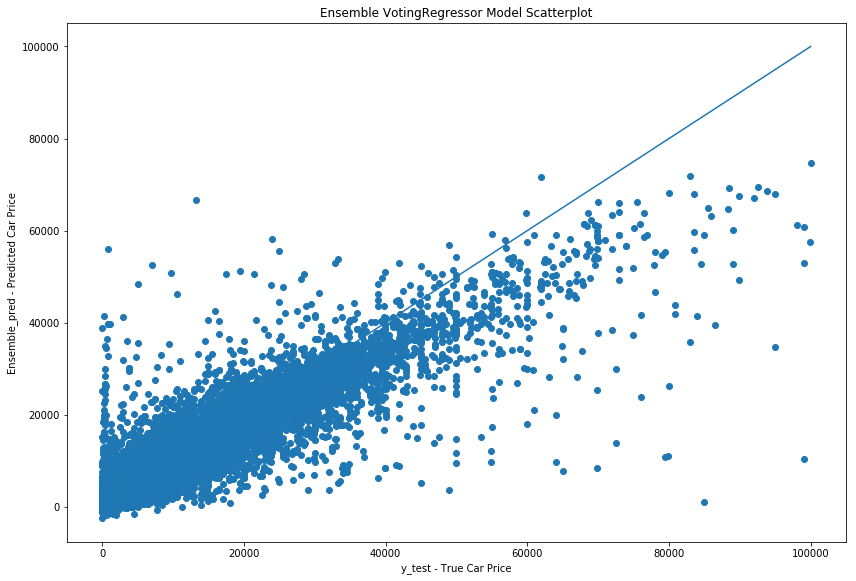

In [317]:
# Create the Scatter plot of Ensemble Voting Regressor model
plt.figure(figsize=(12,8))
plt.scatter(y_test, ensemble_pred)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Ensemble_pred - Predicted Car Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
plt.title('Ensemble VotingRegressor Model Scatterplot')
plt.savefig('Ensemble VotingRegressor Model Scatterplot.pdf')

The above depicts the scatterplot of ensemble voting regressor model predicted car prices versus the observed or true car prices.

## Model Training 4 - Cross Validation

For Ensemble Voting Regressor Model, more than one split is done in cross validation. Cross Validation would reveal consistency in performance of this algorithm and data or reveal inconsistency for further investigation.

In [318]:
# Compute Prediction score of Ensemble Voting Regressor on the dataset by splitting the data and 
# calculating the score 10 consecutive times with different splits each time
VR_Scores = cross_val_score(ensemble, X, y, cv=10)

This would run the Ensemble Voting Regressor with the input or features data and output or target data ten times, 
and measure the score each time.

## R Squared 10-Times Results for Ensemble Voting Regressor with Cross Validation

In [319]:
# Display the Ensemble Voting Regressor Scores - R Squared displayed 10 Times
VR_Scores

array([0.87058442, 0.86186776, 0.87364356, 0.85044999, 0.86411999,
       0.87116298, 0.87819753, 0.86215688, 0.86769663, 0.86614426])

In [353]:
# Calculate the mean or average score of the 10 different models
VR_Score = cross_val_score(ensemble, X, y, cv=10).mean() * 100
print("Average Score of Ensemble Voting Regressor Model is: " , VR_Score)

Average Score of Ensemble Voting Regressor Model is:  86.66024017120846


In [354]:
## Calculate the mean or average ensemble voting regressor prediction score and standard deviation
print("Average Score of Ensemble Voting Regressor Model is: %0.2f (+/- %0.2f)" % (VR_Scores.mean(), VR_Scores.std() * 2))

Average Score of Ensemble Voting Regressor Model is: 0.87 (+/- 0.01)


In [322]:
# Obtaining predictions by cross-validation cross_val_function
# cross_val_predict function returns for each element in the input or features data the prediction that was produced for that element 
# when it was in the test set import cross_val_predict
from sklearn.model_selection import cross_val_predict
VR_cross_val_y_pred = cross_val_predict(ensemble, X, y, cv=10)

In [323]:
# Display the first few lines of Numpy array
VR_cross_val_y_pred[:10]

array([ 1075.28371504,  5834.51345656,  -331.46460635,  3050.7128688 ,
        2777.5937917 ,  4530.11498819, 17468.09336338,  1501.8724682 ,
        5971.01241212,  2119.8805797 ])

## R Squared for Ensemble Voting Regressor with Cross Validation


In [355]:
# Ensemble Voting Regressor with Cross Validation R Squared Metric.
# R Squared has a value between 0 and 1
# Determine the goodness of fit of predicted used car prices to the true values.
VR_RSquared_results = cross_val_score(ensemble, X, y, cv=10, scoring='r2')
print("R Squared of Voting Regressor with Cross Validation Model is: %0.2f (+/- %0.2f)" % (VR_RSquared_results.mean(), VR_RSquared_results.std() * 2))


R Squared of Voting Regressor with Cross Validation Model is: 0.87 (+/- 0.01)


## MAE, MSE and RMSE for Ensemble Voting Regressor with Cross Validation

In [324]:
# Cross Validation Ensemble Voting Regressor MAE
VR_MAE_results = cross_val_score(ensemble, X, y, cv=10, scoring='neg_mean_absolute_error')

# Cross Validation Ensemble Voting Regressor MSE and RMSE
VR_MSE_results = cross_val_score(ensemble, X, y, cv=10, scoring='neg_mean_squared_error')

print("MAE of Ensemble Voting Regressor is: %0.2f (+/- %0.2f)" % (VR_MAE_results.mean(), VR_MAE_results.std() * 2))
print("MSE of Ensemble Voting Regressor is: %0.2f (+/- %0.2f)" % (VR_MSE_results.mean(), VR_MSE_results.std() * 2))
print("RMSE of EVR is: %0.2f (+/-)" % (np.sqrt(-(VR_MSE_results.mean()))), np.sqrt(VR_MSE_results.std() * 2))


MAE of Ensemble Voting Regressor is: -1592.93 (+/- 40.90)
MSE of Ensemble Voting Regressor is: -8699389.24 (+/- 1179254.80)
RMSE of EVR is: 2949.47 (+/-) 1085.9349875617643


The Mean Square Error (MSE) returned by Scikit Learn Cross Validation cros_val_score is always a negative. Hence, the absolute value should be taken or make the negative sign positive before taking the square root to calculate RMSE. Also, the negative sign before MAE and MSE results should be ignored when using these metrics for presentation or description.

Ensemble Voting Regressor model with cross validation produced MAE metric value of 1592.93, 
MSE metric value of 8699389.27 and RMSE metric value of 2949.47.


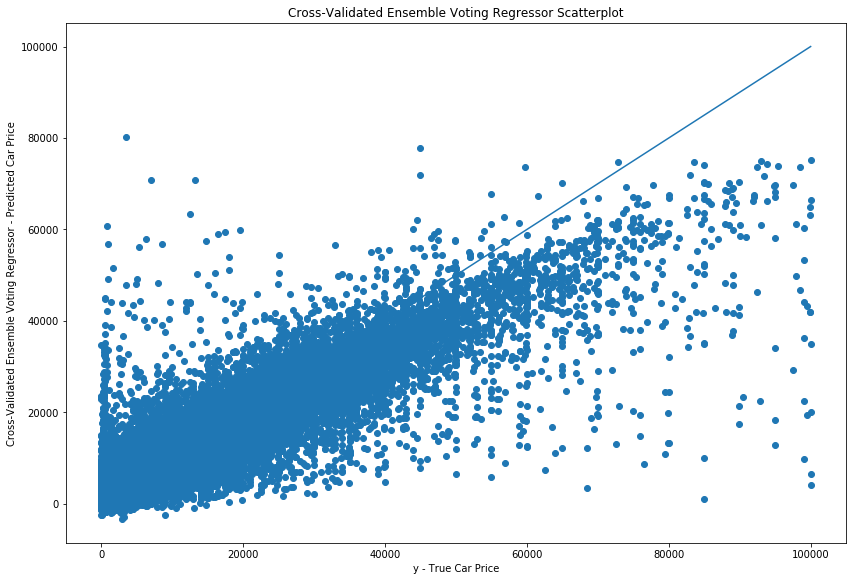

In [325]:
# Create Scatter Plot of Ensemble Voting Regressor model with Cross-Validation
plt.figure(figsize=(12,8))
plt.scatter(y, VR_cross_val_y_pred)
plt.xlabel('y - True Car Price')
plt.ylabel('Cross-Validated Ensemble Voting Regressor - Predicted Car Price')
plt.plot([min(y), max(y)], [min(y), max(y)])
plt.tight_layout()
plt.title('Cross-Validated Ensemble Voting Regressor Scatterplot')
plt.savefig('Cross-Validated Ensemble Voting Regressor Scatterplot.pdf')


The above depicts the scatterplot of ensemble voting regressor model with cross validation predicted car prices 
versus the observed or true car prices.

In [326]:
# https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
# Writing autos_cleaned_data_df3 dataframe to csv file
autos_cleaned_data_df3.to_csv("autos_cleaned_data3.csv", index=False)

## Conclusion

Multiple Linear Regression (MLR), Decision Tree Regression (DTR), Random Forest Regression (RFR) and Ensemble Voting Regressor are four popular strategies for machine learning and regression. In this project, these four machine learning techniques were leveraged to develop four models for predicting the price of used cars based on Kaggle dataset located at https://www.kaggle.com/orgesleka/used-cars-database. Four evaluation metrics including R Squared, Mean Absolute Error (MAE), Mean Square Error (MSE) and Root Mean Square Error (RMSE) were used to select the best model for predicting the price of used cars.


After performing the data cleaning technique on the data, both missing values and outliers were removed from the dataset. Then the data was split into 70/30 train to test ratio. This was utilized in constructing the four models using the machine learning regression techniques. From the results obtained from these four models, Random Forest Regression model produced the best results based on the four-evaluation metrics. Random Forest Regression model generated R-Squared metric of 0.89, Mean Absolute Error (MAE) of 1288.38, Mean Square Error (MSE) of 7154066.55 and Root Mean Square Error metric of 2674.71.


To further showcase the consistency about the performance of the four machine learning regression algorithms used in this project, cross validation technique was incorporated to the data splitting process. Ten splits in cross validation was utilized in this project. The four machine learning regression techniques were run with the features data and target data ten times and the results produced were measured each time. Four models leveraging cross validation were created using these four regression techinques. Again, Random Forest Regression with the incorporation of cross validation produced the best metric results. It yielded an average R Squared result of 0.89, Mean Absolute Error (MAE) of 1249.78, Mean Square Error (MSE) of 6895795.87 and Root Mean Square Error of 2625.98. Hence, it is the regression model selected for predicting the price of used cars.


This project further showcases Car Power Engine, Car Mileage, and the Age of the car as the three most important features in predicting the price of used cars based on the results obtained from feature selection.

Future work on this project would include predicting the price of each brand and model of used car collections in this dataset. It would be interesting to learn how the inclusion of pictures into the dataset would influence predicting the price of used cars.
